In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<h1>DENGUE DATA ANALYSIS</h1>
<h2>INCLUSIVE YEAR 2016 - 2020</h2>
<h3>Analyst: Khristian Rodas</h3>

In [2]:
dengue = pd.read_csv("dataset\\dengue.csv")

In [3]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [4]:
dengue.describe()

,Year,Dengue_Cases,Dengue_Deaths
count,1020.000000,1020.000000,1020.000000
mean,2018.000000,1124.926471,16.513725
std,1.414907,1662.608878,96.358215
min,2016.000000,10.000000,0.000000
25%,2017.000000,247.750000,1.000000
50%,2018.000000,582.500000,3.000000
75%,2019.000000,1284.250000,7.000000
max,2020.000000,21658.000000,1651.000000


In [5]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [6]:
dengue.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

<h1>Converting the data types to categorical</h1>

In [7]:
for col in["Month","Year", "Region"]:
    dengue[col] = dengue[col].astype('category')

In [8]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Month          1020 non-null   category
 1   Year           1020 non-null   category
 2   Region         1020 non-null   category
 3   Dengue_Cases   1020 non-null   int64   
 4   Dengue_Deaths  1020 non-null   int64   
dtypes: category(3), int64(2)
memory usage: 20.3 KB


<h1>Insight 1: Dengue Cases rate categorized in Month</h1>
<h2>It shows that August has the highest number of Dengue Cases due to it's Weather</h2>
<h3>I used .unique() function to retain the form of Months away from alphabetical order</h3>

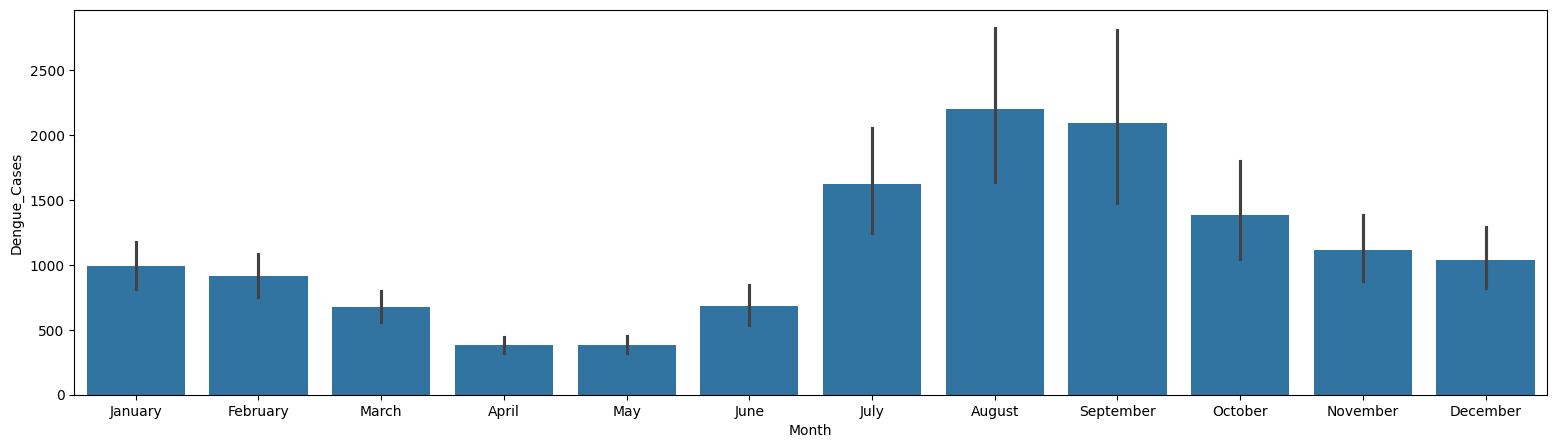

In [9]:
order = dengue['Month'].unique() 
sns.barplot(data=dengue,x="Month",y="Dengue_Cases",order=order)
plt.gcf().set_size_inches(19,5)
plt.show()

<h1>Insight 2: The data is so much broad, lets try to adjust the output</h1>
<h1>Lets make new Data Frame that consist only the 2019 data</h1>

In [10]:
dengue2020 = dengue[dengue["Year"]==2020]
dengue2019 = dengue[dengue["Year"]==2019]
dengue2018 = dengue[dengue["Year"]==2018]
dengue2017 = dengue[dengue["Year"]==2017]
dengue2016 = dengue[dengue["Year"]==2016]

In [11]:
dengue2019

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
36,January,2019,Region I,596,2
37,February,2019,Region I,633,1
38,March,2019,Region I,399,0
39,April,2019,Region I,183,1
40,May,2019,Region I,197,1
...,...,...,...,...,...
1003,August,2019,BARMM,811,6
1004,September,2019,BARMM,807,2
1005,October,2019,BARMM,481,2
1006,November,2019,BARMM,362,0


<h1>Insight 3: Barplot Visualization of the relation of Dengue Deaths over its Months in 2019 Data</h1>

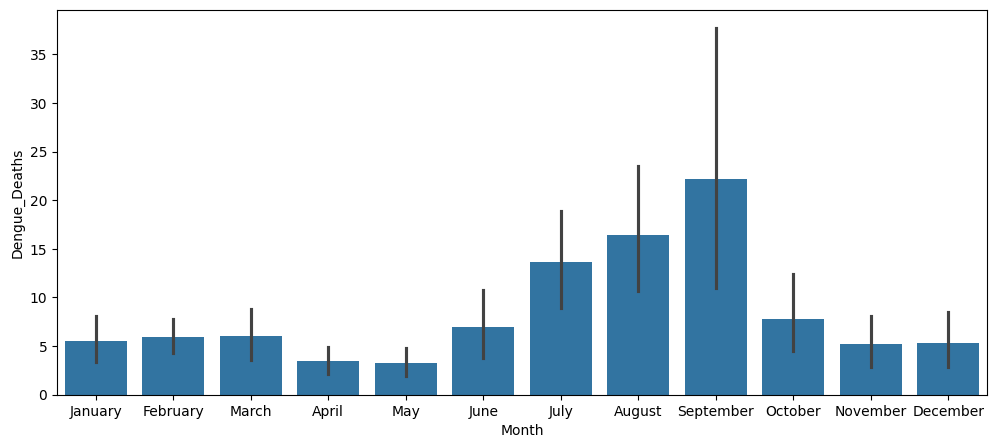

In [12]:
order = dengue['Month'].unique() 
sns.barplot(x='Month', y='Dengue_Deaths', data=dengue2019, order=order)
plt.gcf().set_size_inches(12,5)
plt.show()

<h1>Insight 4: Average number of dengue cases per month in year 2019</h1>

In [13]:
avg_case = np.round(dengue2019.groupby('Month')['Dengue_Cases'].mean())
avg_case

Month
April         544.0
August       5002.0
December     1435.0
February     1500.0
January      1216.0
July         3248.0
June         1501.0
March        1165.0
May           611.0
November     1770.0
October      2728.0
September    5273.0
Name: Dengue_Cases, dtype: float64

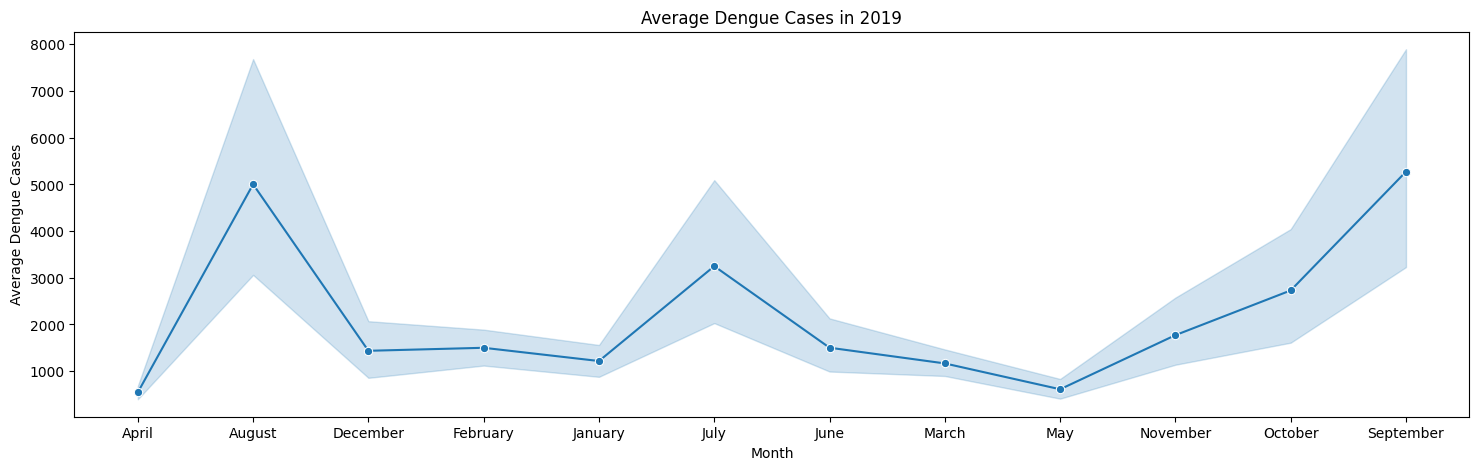

In [14]:
order = dengue['Month'].unique() 
sns.lineplot(data=dengue2019, x='Month', y='Dengue_Cases', marker='o')
plt.gcf().set_size_inches(18,5)
plt.title('Average Dengue Cases in 2019')
plt.xlabel('Month')
plt.ylabel('Average Dengue Cases')
plt.show()

<h1>Insight 5: Month that has the highest number of cases of Dengue</h1>
<h3>Highest number of dengue cases: 21658 in September</h3>

In [15]:
dng = dengue['Dengue_Cases'].max()
month = dengue.loc[dengue['Dengue_Cases'].idxmax(), 'Month']
print(f'Highest number of dengue cases: {dng} in {month}')

Highest number of dengue cases: 21658 in September


<h1>Insight 6: Month that has the highest number of cases of Dengue in 2018</h1>
<h3>Highest number of dengue cases: 5581 in August</h3>

In [16]:
dng2018 = dengue2018['Dengue_Cases'].max()
month2018 = dengue2018.loc[dengue2018['Dengue_Cases'].idxmax(), 'Month']
print(f'Highest number of dengue cases: {dng2018} in {month2018}')

Highest number of dengue cases: 5581 in August


<h1>Insight 7: Month that has the highest number of cases of Dengue in 2017</h1>
<h3>Highest number of dengue cases: 4764 in August</h3>

In [17]:
dng2017 = dengue2017['Dengue_Cases'].max()
month2017 = dengue2017.loc[dengue2017['Dengue_Cases'].idxmax(), 'Month']
print(f'Highest number of dengue cases: {dng2017} in {month2017}')

Highest number of dengue cases: 4764 in August


<h1>Insight 8: Month that has the highest number of cases of Dengue in 2016</h1>
<h3>Highest number of dengue cases: 7155 in August</h3>

In [18]:
dng2016 = dengue2016['Dengue_Cases'].max()
month2016 = dengue2016.loc[dengue2016['Dengue_Cases'].idxmax(), 'Month']
print(f'Highest number of dengue cases: {dng2016} in {month2016}')

Highest number of dengue cases: 7155 in August


<h1>Insight 9: Lowest recorded month with number of Dengue Cases</h1>
<h3>Month with the fewest dengue cases: May</h3>

In [19]:
month = dengue.groupby(dengue['Month'])['Dengue_Cases'].mean().idxmin()
print(f"Month with the fewest dengue cases: {month}")

Month with the fewest dengue cases: May


<h1>Insight 10: The highest average number of deaths of dengue case in all region</h1>
<h3>The data shows that NCR has the highest average number of deaths at 0.094</h3>

In [20]:
dengue['Deaths_Count'] = dengue['Dengue_Deaths'] / dengue['Dengue_Cases']
avg_deaths = dengue.groupby('Region')['Deaths_Count'].mean()
avg_deaths

Region
BARMM          0.065735
CAR            0.069733
NCR            0.094127
Region I       0.003880
Region II      0.004312
Region III     0.003285
Region IV-A    0.004630
Region IV-B    0.004592
Region IX      0.050159
Region V       0.009745
Region VI      0.044048
Region VII     0.033174
Region VIII    0.044665
Region X       0.039337
Region XI      0.038167
Region XII     0.078923
Region XIII    0.093691
Name: Deaths_Count, dtype: float64

<h1>Insight 11: Average number of deaths of dengue case in all region </h1>

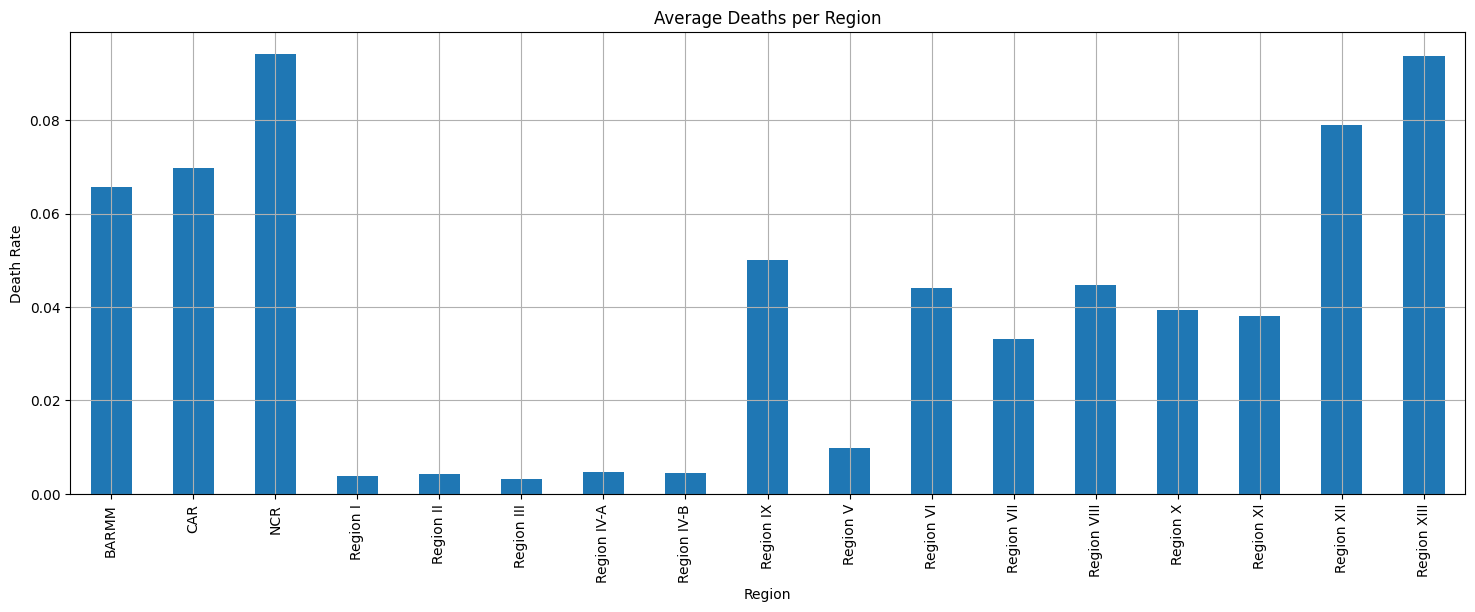

In [21]:
plt.figure(figsize=(18, 6))
avg_deaths.plot(kind='bar')
plt.grid()
plt.title('Average Deaths per Region')
plt.xlabel('Region')
plt.ylabel('Death Rate')
plt.show()

<h1>Insight 12: Dengue cases over the years</h1>

In [22]:
cases = dengue.groupby('Year')['Dengue_Cases'].sum()
cases

Year
2016    209544
2017    154155
2018    250783
2019    441902
2020     91041
Name: Dengue_Cases, dtype: int64

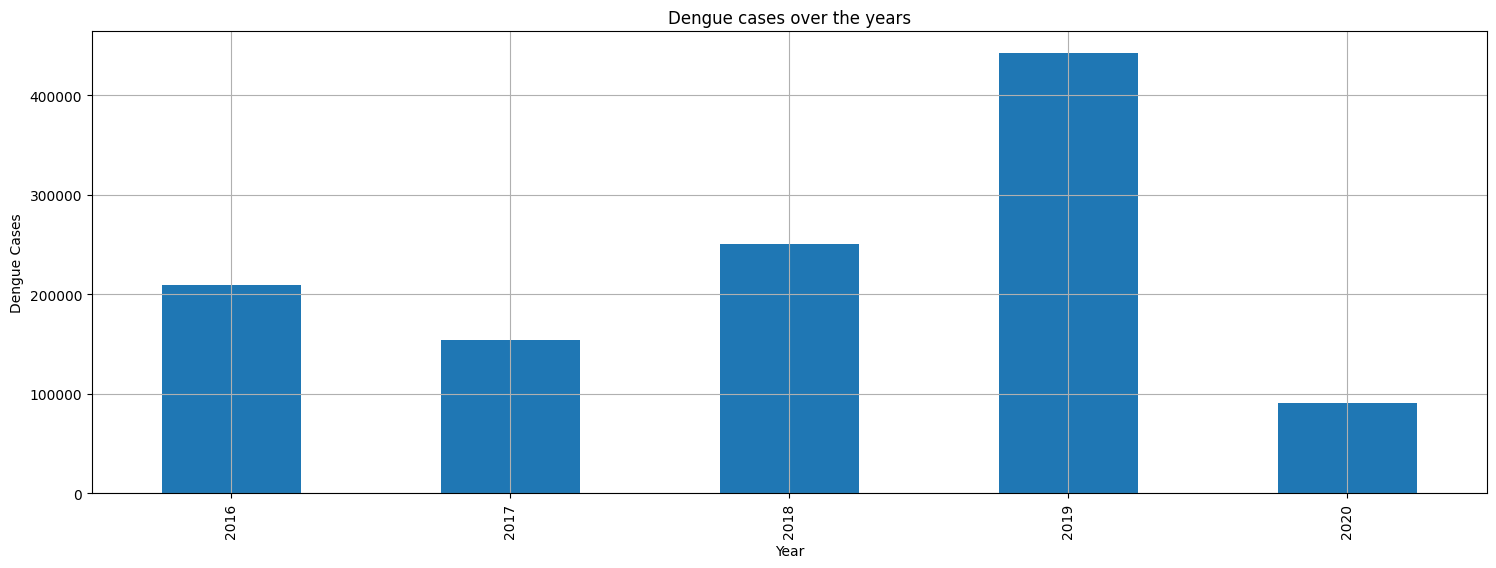

In [23]:
plt.figure(figsize=(18, 6))
cases.plot(kind='bar')
plt.grid()
plt.title('Dengue cases over the years')
plt.xlabel('Year')
plt.ylabel('Dengue Cases')
plt.show()

<h1>Insight 13: Pattern of Dengue cases over the Years</h1>

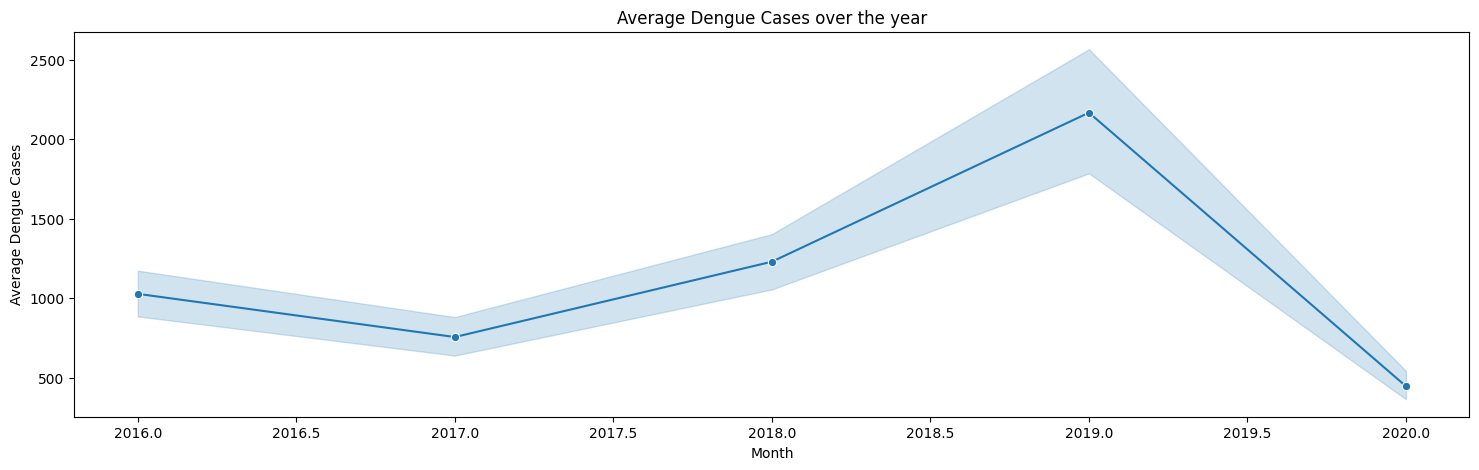

In [24]:
sns.lineplot(data=dengue, x='Year', y='Dengue_Cases', marker='o')
plt.gcf().set_size_inches(18,5)
plt.title('Average Dengue Cases over the year')
plt.xlabel('Month')
plt.ylabel('Average Dengue Cases')
plt.show()

<h1>Insight 14: When examining year, month, and death counts collectively, which regions exhibited the most pronounced spikes in monthly cases?</h1>

In [25]:
dengue = dengue.sort_values(by=['Region', 'Year', 'Month'])
dengue['Case_pro'] = dengue.groupby('Region')['Dengue_Cases'].diff()
dengue['Death_pro'] = dengue.groupby('Region')['Dengue_Deaths'].diff()
max_spike = dengue.loc[dengue['Case_pro'].idxmax()]
spike = dengue[dengue['Case_pro'] > 0]

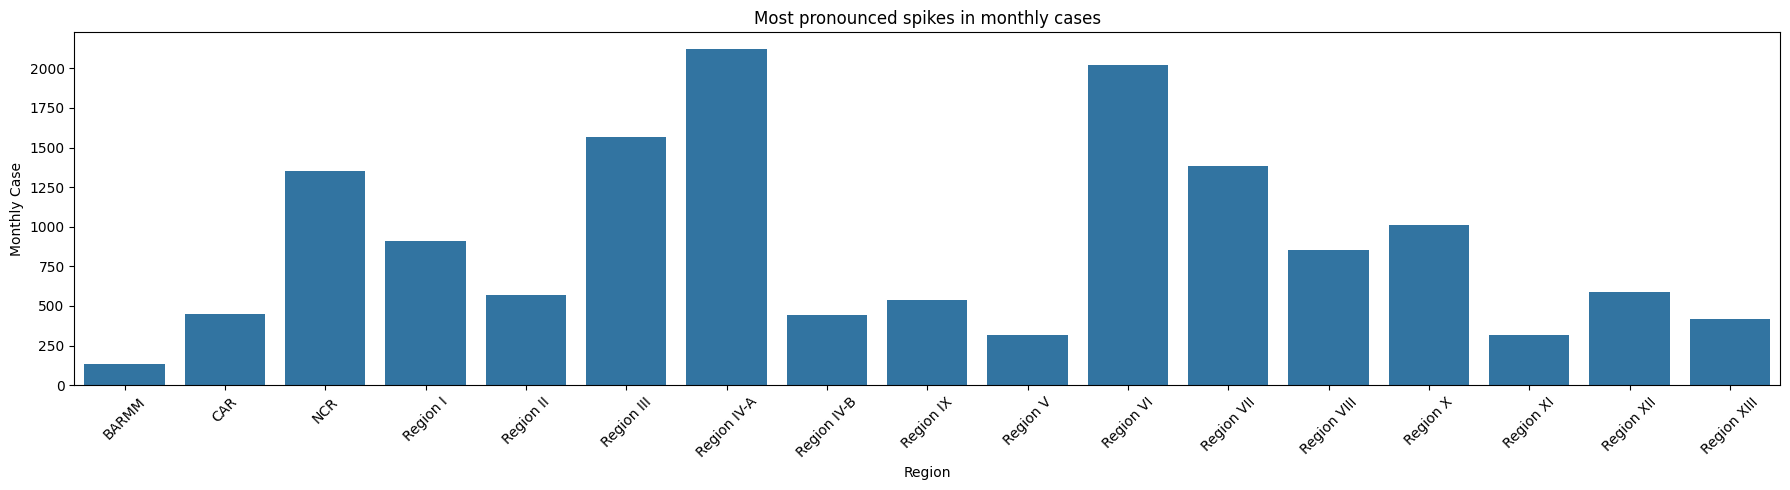

In [26]:
plt.gcf().set_size_inches(18,5)
sns.barplot(x='Region', y='Case_pro', data=spike, ci=None,)
plt.title("Most pronounced spikes in monthly cases")
plt.xlabel("Region")
plt.ylabel("Monthly Case")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h1>Insight 15: What groupings of years display comparable trends in dengue outbreaks across regions?</h1>

In [27]:
agg_data = dengue.groupby(['Year', 'Region'])['Dengue_Cases'].sum().reset_index()
agg_data

,Year,Region,Dengue_Cases
0,2016,BARMM,2191
1,2016,CAR,9164
2,2016,NCR,13002
3,2016,Region I,8281
4,2016,Region II,3891
...,...,...,...
80,2020,Region VIII,4832
81,2020,Region X,6225
82,2020,Region XI,1936
83,2020,Region XII,4363


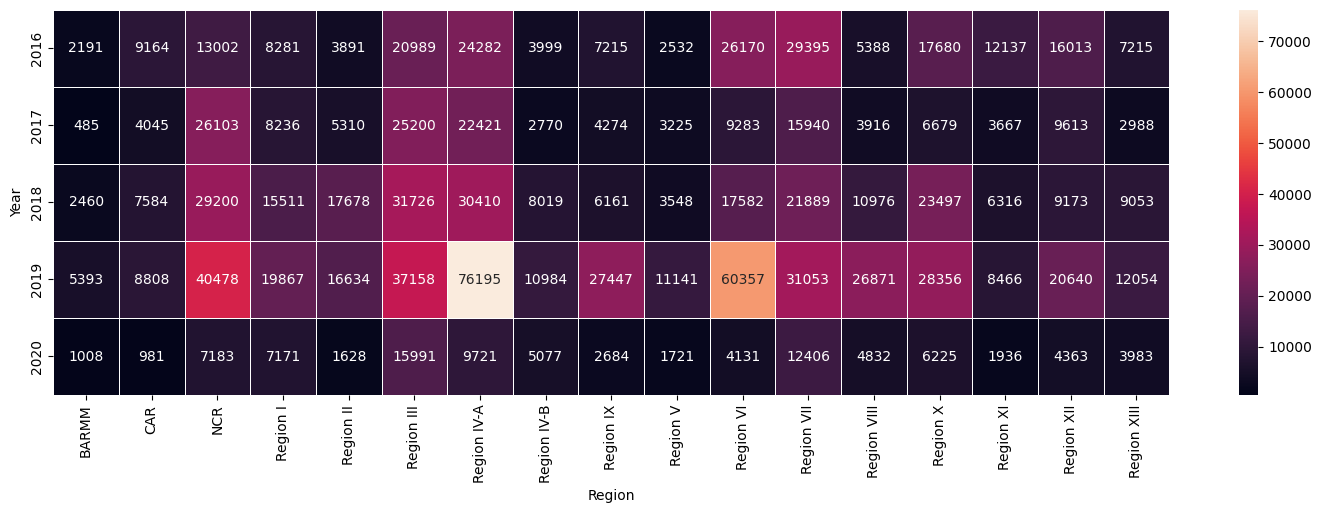

In [28]:
heatmap_data = agg_data.pivot(index='Year', columns='Region', values='Dengue_Cases').fillna(0)
sns.heatmap(heatmap_data, annot=True, fmt=".0f", linewidths=.5)
plt.gcf().set_size_inches(18,5)
plt.show()

<h1>Insight 16: Comparable trends in dengue outbreaks across regions in the Year 2016</h1>

In [29]:
agg_data2016 = dengue2016.groupby(['Year', 'Region'])['Dengue_Cases'].sum().reset_index()
agg_data2016

,Year,Region,Dengue_Cases
0,2016,BARMM,2191
1,2016,CAR,9164
2,2016,NCR,13002
3,2016,Region I,8281
4,2016,Region II,3891
...,...,...,...
80,2020,Region VIII,0
81,2020,Region X,0
82,2020,Region XI,0
83,2020,Region XII,0


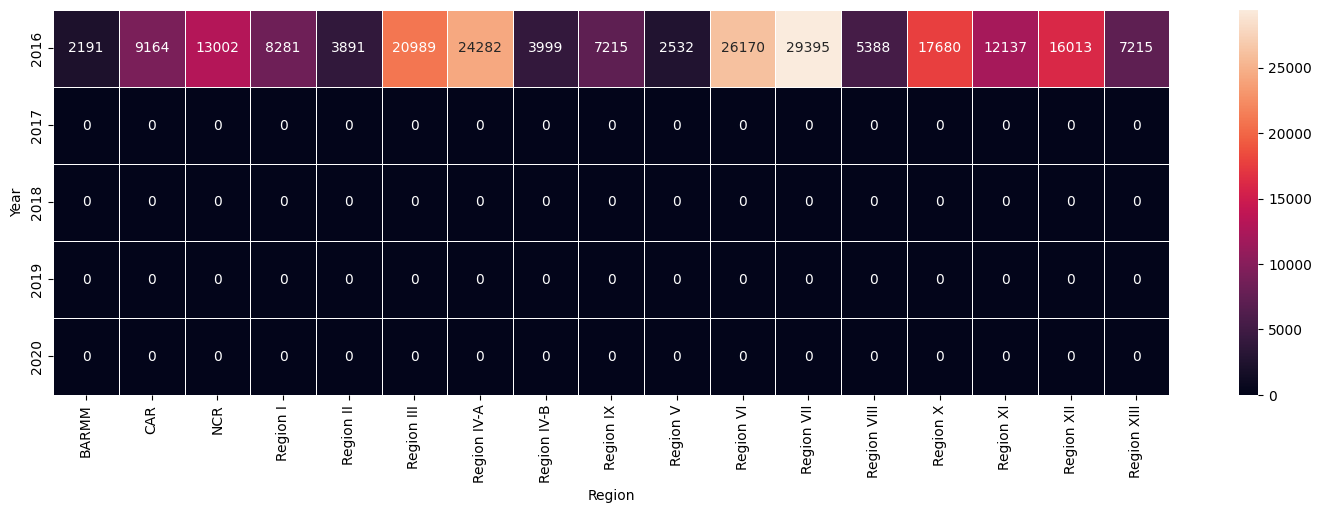

In [30]:
heatmap_data = agg_data2016.pivot(index='Year', columns='Region', values='Dengue_Cases').fillna(0)
sns.heatmap(heatmap_data, annot=True, fmt=".0f", linewidths=.5)
plt.gcf().set_size_inches(18,5)
plt.show()

<h1>Insight 17: Comparable trends in dengue outbreaks across regions in the Year 2017</h1>

In [31]:
agg_data2017 = dengue2017.groupby(['Year', 'Region'])['Dengue_Cases'].sum().reset_index()
agg_data2017

,Year,Region,Dengue_Cases
0,2016,BARMM,0
1,2016,CAR,0
2,2016,NCR,0
3,2016,Region I,0
4,2016,Region II,0
...,...,...,...
80,2020,Region VIII,0
81,2020,Region X,0
82,2020,Region XI,0
83,2020,Region XII,0


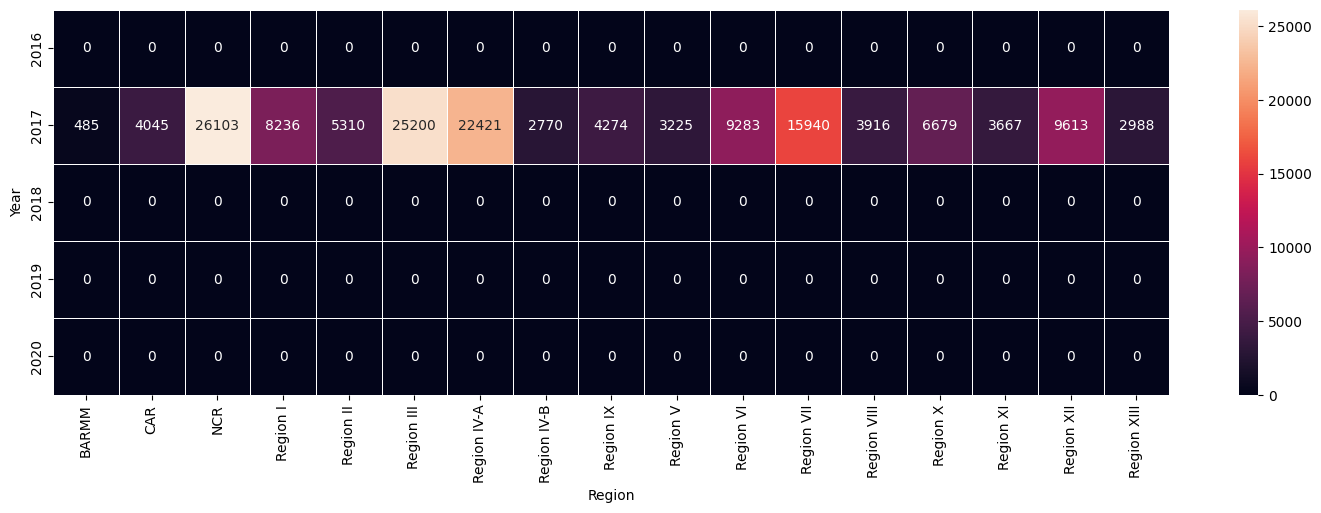

In [32]:
heatmap_data = agg_data2017.pivot(index='Year', columns='Region', values='Dengue_Cases').fillna(0)
sns.heatmap(heatmap_data, annot=True, fmt=".0f", linewidths=.5)
plt.gcf().set_size_inches(18,5)
plt.show()

<h1>Insight 18: Comparable trends in dengue outbreaks across regions in the Year 2018</h1>

In [33]:
agg_data2018 = dengue2018.groupby(['Year', 'Region'])['Dengue_Cases'].sum().reset_index()
agg_data2018

,Year,Region,Dengue_Cases
0,2016,BARMM,0
1,2016,CAR,0
2,2016,NCR,0
3,2016,Region I,0
4,2016,Region II,0
...,...,...,...
80,2020,Region VIII,0
81,2020,Region X,0
82,2020,Region XI,0
83,2020,Region XII,0


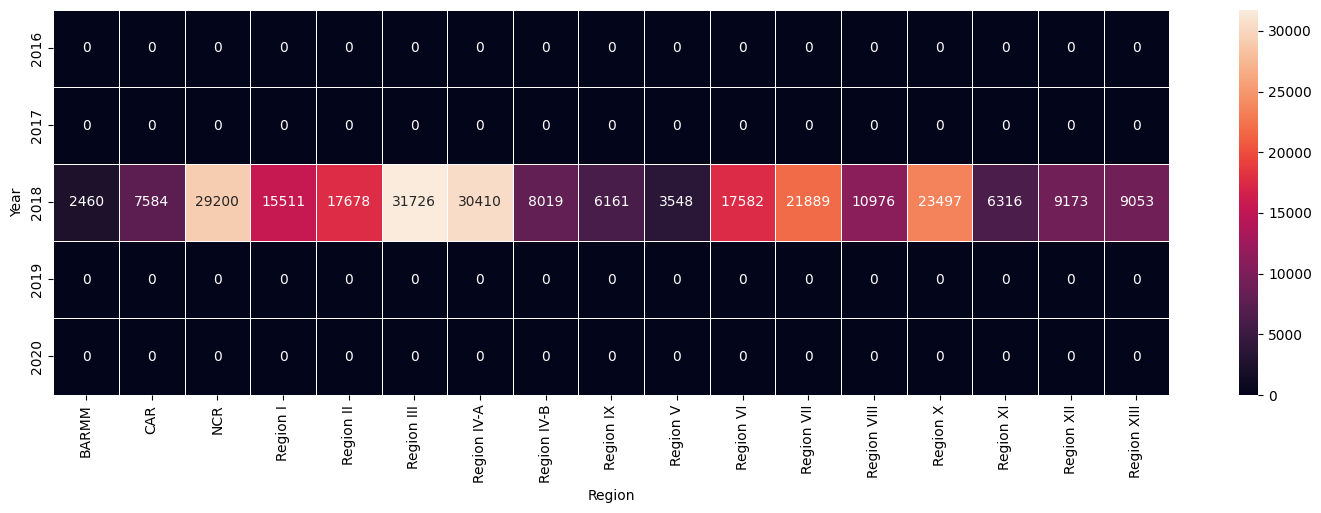

In [34]:
heatmap_data = agg_data2018.pivot(index='Year', columns='Region', values='Dengue_Cases').fillna(0)
sns.heatmap(heatmap_data, annot=True, fmt=".0f", linewidths=.5)
plt.gcf().set_size_inches(18,5)
plt.show()

<h1>Insight 19: Comparable trends in dengue outbreaks across regions in the Year 2019</h1>

In [35]:
agg_data2019 = dengue2019.groupby(['Year', 'Region'])['Dengue_Cases'].sum().reset_index()
agg_data2019

,Year,Region,Dengue_Cases
0,2016,BARMM,0
1,2016,CAR,0
2,2016,NCR,0
3,2016,Region I,0
4,2016,Region II,0
...,...,...,...
80,2020,Region VIII,0
81,2020,Region X,0
82,2020,Region XI,0
83,2020,Region XII,0


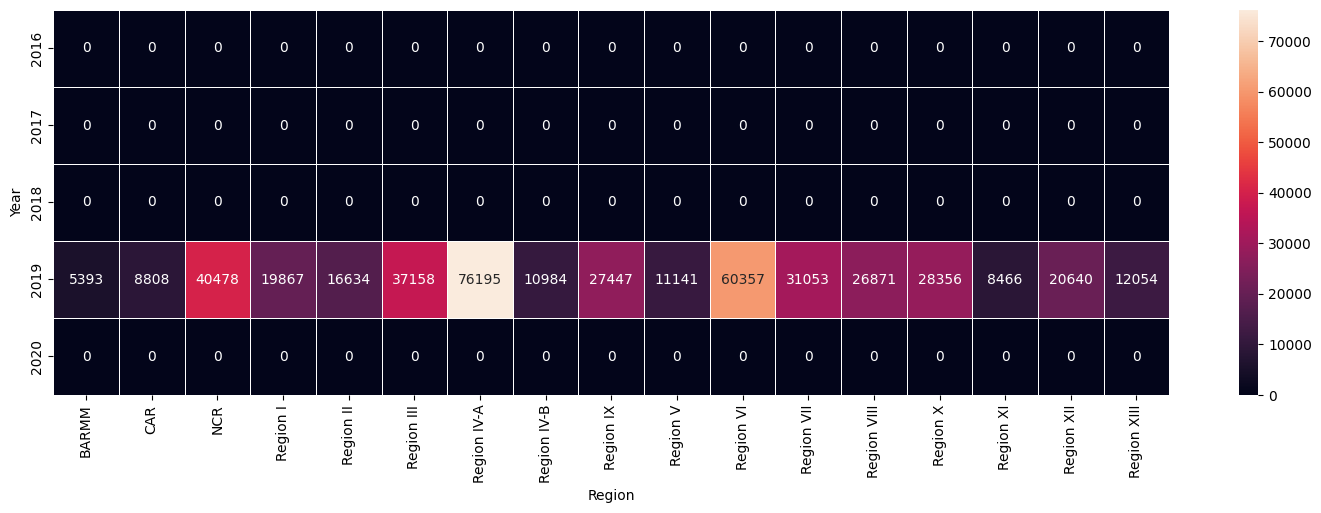

In [36]:
heatmap_data = agg_data2019.pivot(index='Year', columns='Region', values='Dengue_Cases').fillna(0)
sns.heatmap(heatmap_data, annot=True, fmt=".0f", linewidths=.5)
plt.gcf().set_size_inches(18,5)
plt.show()

<h1>Insight 20: Comparable trends in dengue outbreaks across regions in the Year 2020</h1>

In [37]:
agg_data2020 = dengue2020.groupby(['Year', 'Region'])['Dengue_Cases'].sum().reset_index()
agg_data2020

,Year,Region,Dengue_Cases
0,2016,BARMM,0
1,2016,CAR,0
2,2016,NCR,0
3,2016,Region I,0
4,2016,Region II,0
...,...,...,...
80,2020,Region VIII,4832
81,2020,Region X,6225
82,2020,Region XI,1936
83,2020,Region XII,4363


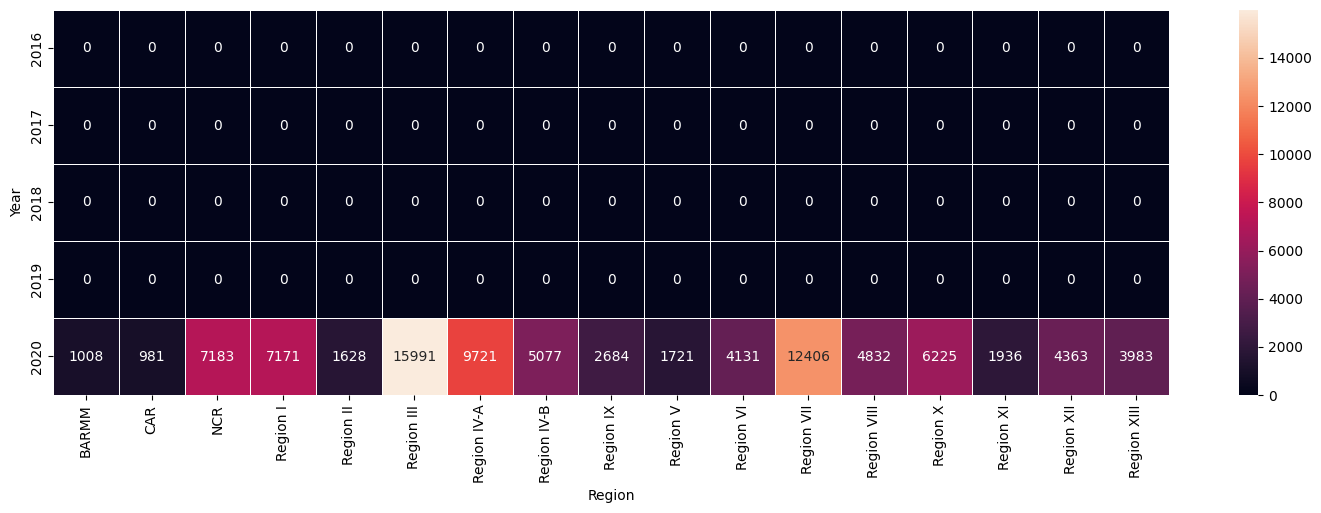

In [38]:
heatmap_data = agg_data2020.pivot(index='Year', columns='Region', values='Dengue_Cases').fillna(0)
sns.heatmap(heatmap_data, annot=True, fmt=".0f", linewidths=.5)
plt.gcf().set_size_inches(18,5)
plt.show()

In [39]:
reg_year = dengue.groupby(['Region', 'Year']).agg({'Dengue_Cases': 'sum', 'Dengue_Deaths': 'sum'}).reset_index()
reg_year



,Region,Year,Dengue_Cases,Dengue_Deaths
0,BARMM,2016,2191,243
1,BARMM,2017,485,2
2,BARMM,2018,2460,33
3,BARMM,2019,5393,31
4,BARMM,2020,1008,23
...,...,...,...,...
80,Region XIII,2016,7215,824
81,Region XIII,2017,2988,14
82,Region XIII,2018,9053,42
83,Region XIII,2019,12054,27


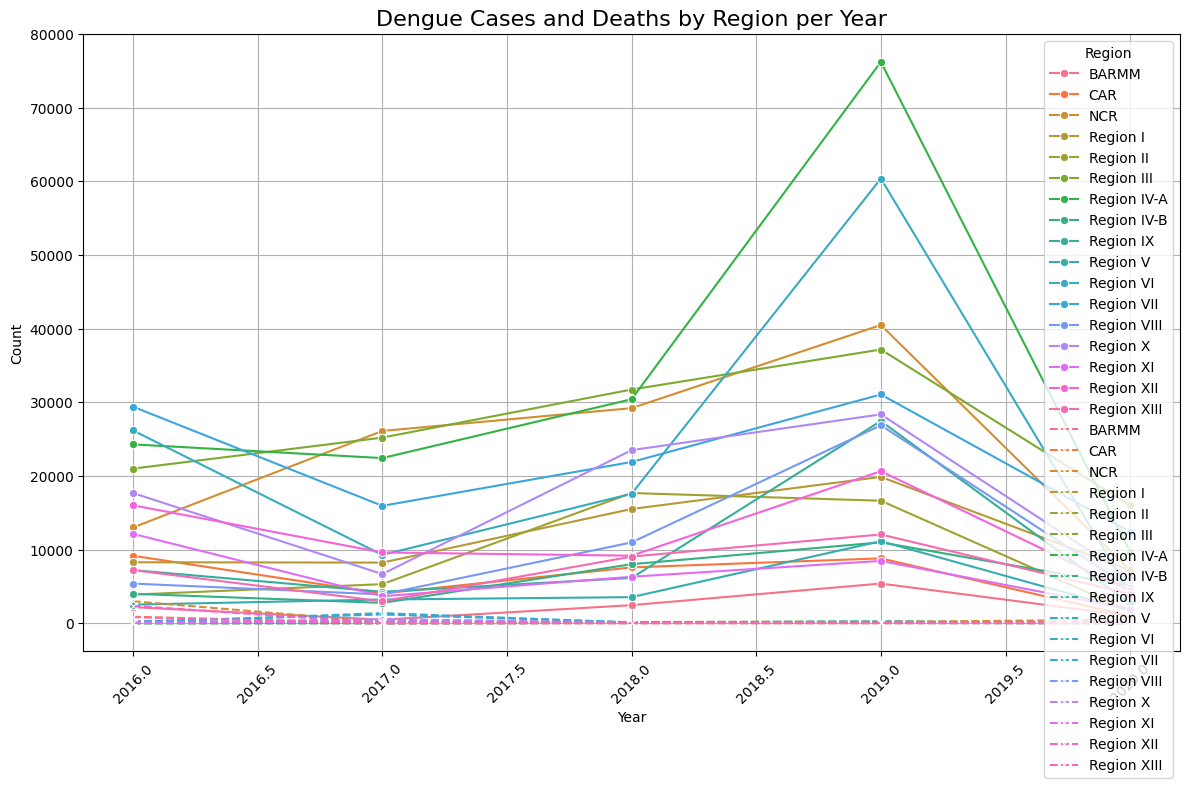

In [40]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='Year', y='Dengue_Cases', hue='Region', data=reg_year, marker='o')
sns.lineplot(x='Year', y='Dengue_Deaths', hue='Region', data=reg_year, marker='x', linestyle='--')

plt.title('Dengue Cases and Deaths by Region per Year', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Region')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()
# Plot the dengue cases and deaths for each region





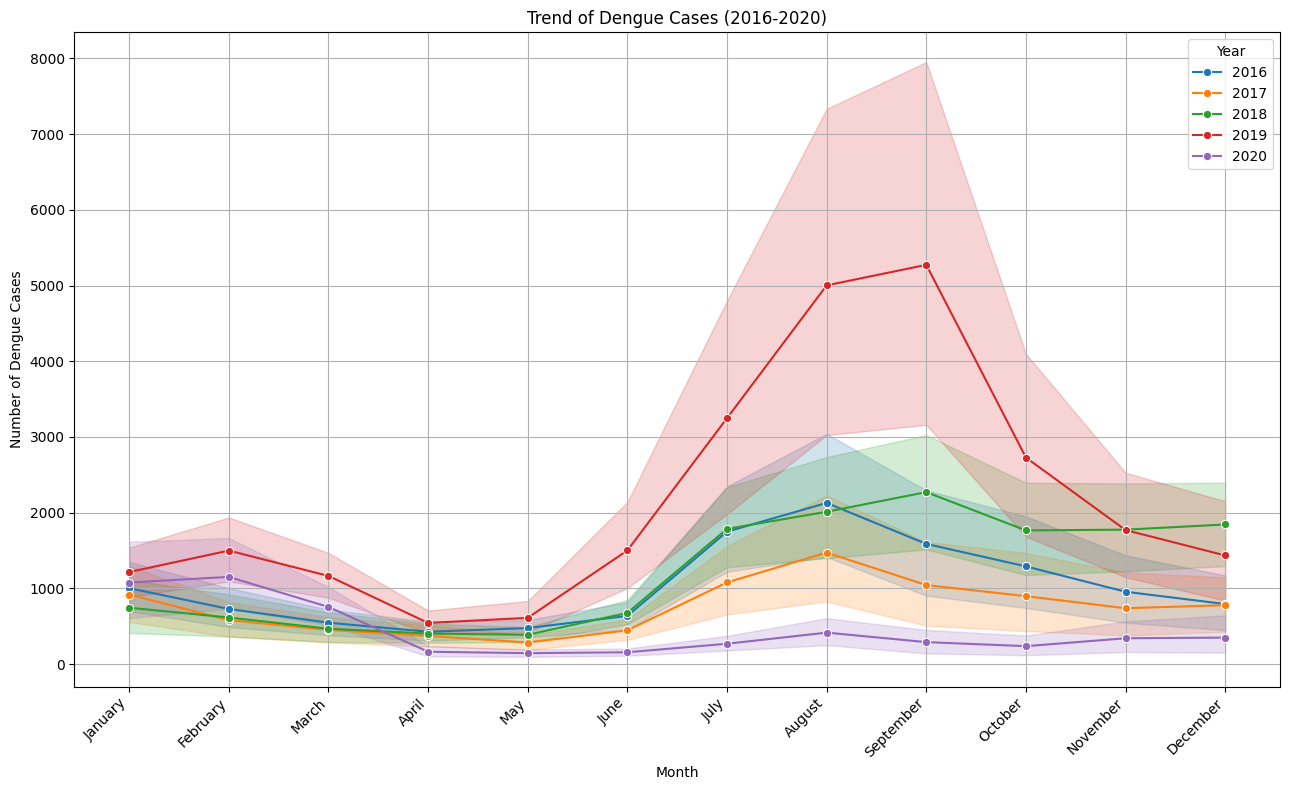

In [41]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

barmm = dengue[dengue['Region']== "BARMM"]
region1 = dengue[dengue['Region']== "Region I"]
region2 = dengue[dengue['Region']== "Region II"]
region3 = dengue[dengue['Region']== "Region III"]
region4a = dengue[dengue['Region']== "Region IV-A"]
region4b = dengue[dengue['Region']== "Region IV-B"]
region5 = dengue[dengue['Region']== "Region V"]
region6 = dengue[dengue['Region']== "Region VI"]
region7 = dengue[dengue['Region']== "Region VII"]
region8 = dengue[dengue['Region']== "Region VIII"]
region9 = dengue[dengue['Region']== "Region IX"]
region10 = dengue[dengue['Region']== "Region X"]
region11 = dengue[dengue['Region']== "Region XI"]
region12 = dengue[dengue['Region']== "Region XII"]
region13 = dengue[dengue['Region']== "Region XIII"]
ncr = dengue[dengue['Region']== "NCR"]
car = dengue[dengue['Region']== "CAR"]

# Create the line plot
sns.lineplot( data=dengue, x='Month', y='Dengue_Cases', hue='Year', marker='o')
plt.gcf().set_size_inches(13, 8)
plt.title('Trend of Dengue Cases (2016-2020)')
plt.xlabel('Month')
plt.ylabel('Number of Dengue Cases')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

In [42]:
dengue["Region"].value_counts()

Region
BARMM          60
CAR            60
NCR            60
Region I       60
Region II      60
Region III     60
Region IV-A    60
Region IV-B    60
Region IX      60
Region V       60
Region VI      60
Region VII     60
Region VIII    60
Region X       60
Region XI      60
Region XII     60
Region XIII    60
Name: count, dtype: int64

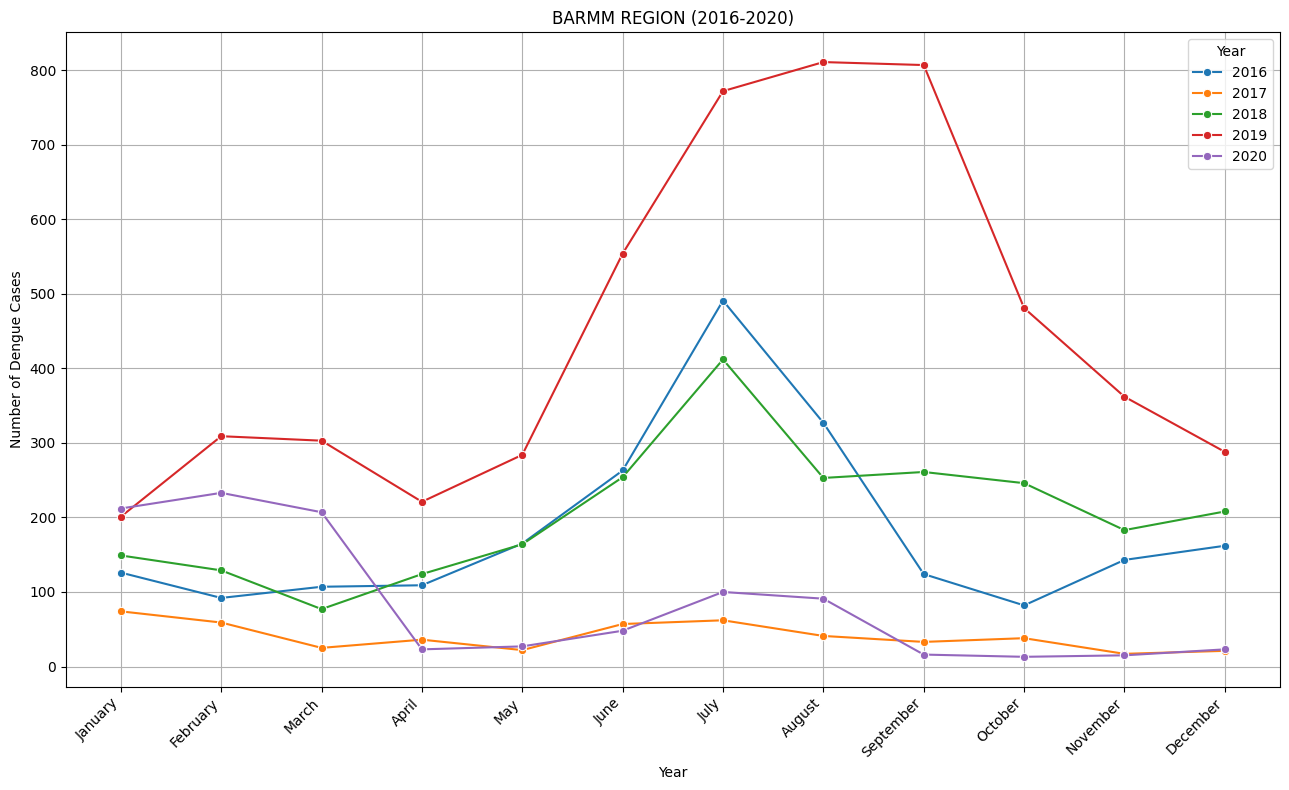

In [43]:
sns.lineplot( data=barmm, x='Month', y='Dengue_Cases', hue = 'Year', marker='o')
plt.gcf().set_size_inches(13, 8)
plt.title('BARMM REGION (2016-2020)')
plt.xlabel('Year')
plt.ylabel('Number of Dengue Cases')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

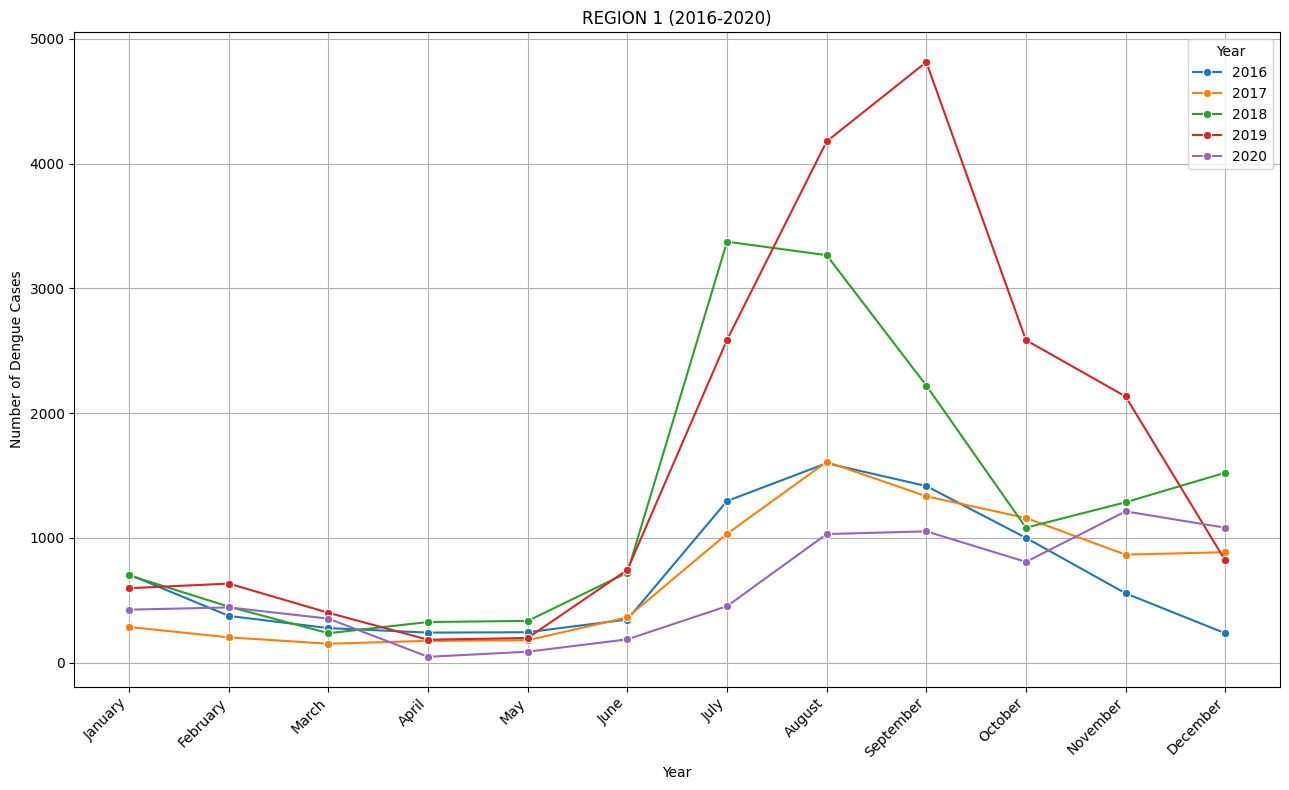

In [44]:
sns.lineplot( data=region1, x='Month', y='Dengue_Cases', hue = 'Year', marker='o')
plt.gcf().set_size_inches(13, 8)
plt.title('REGION 1 (2016-2020)')
plt.xlabel('Year')
plt.ylabel('Number of Dengue Cases')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

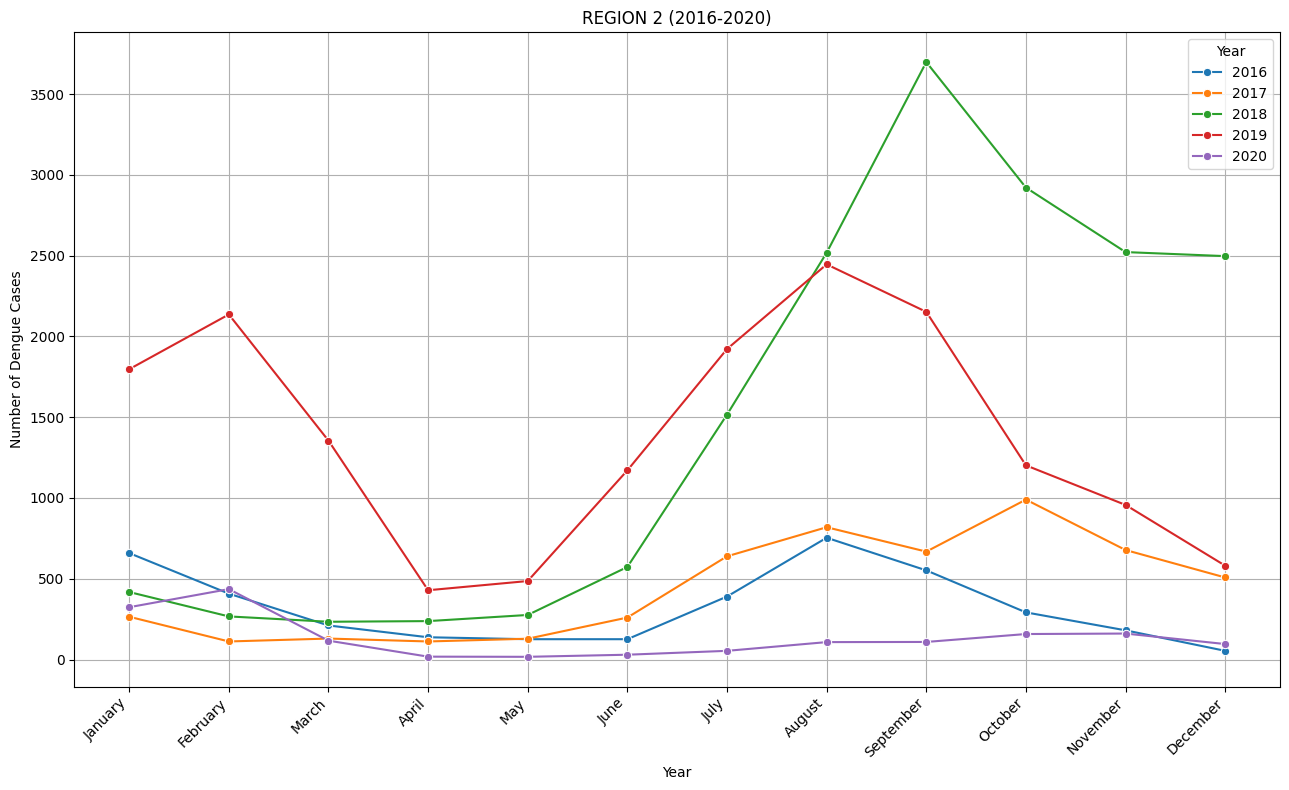

In [45]:
sns.lineplot( data=region2, x='Month', y='Dengue_Cases', hue = 'Year', marker='o')
plt.gcf().set_size_inches(13, 8)
plt.title('REGION 2 (2016-2020)')
plt.xlabel('Year')
plt.ylabel('Number of Dengue Cases')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

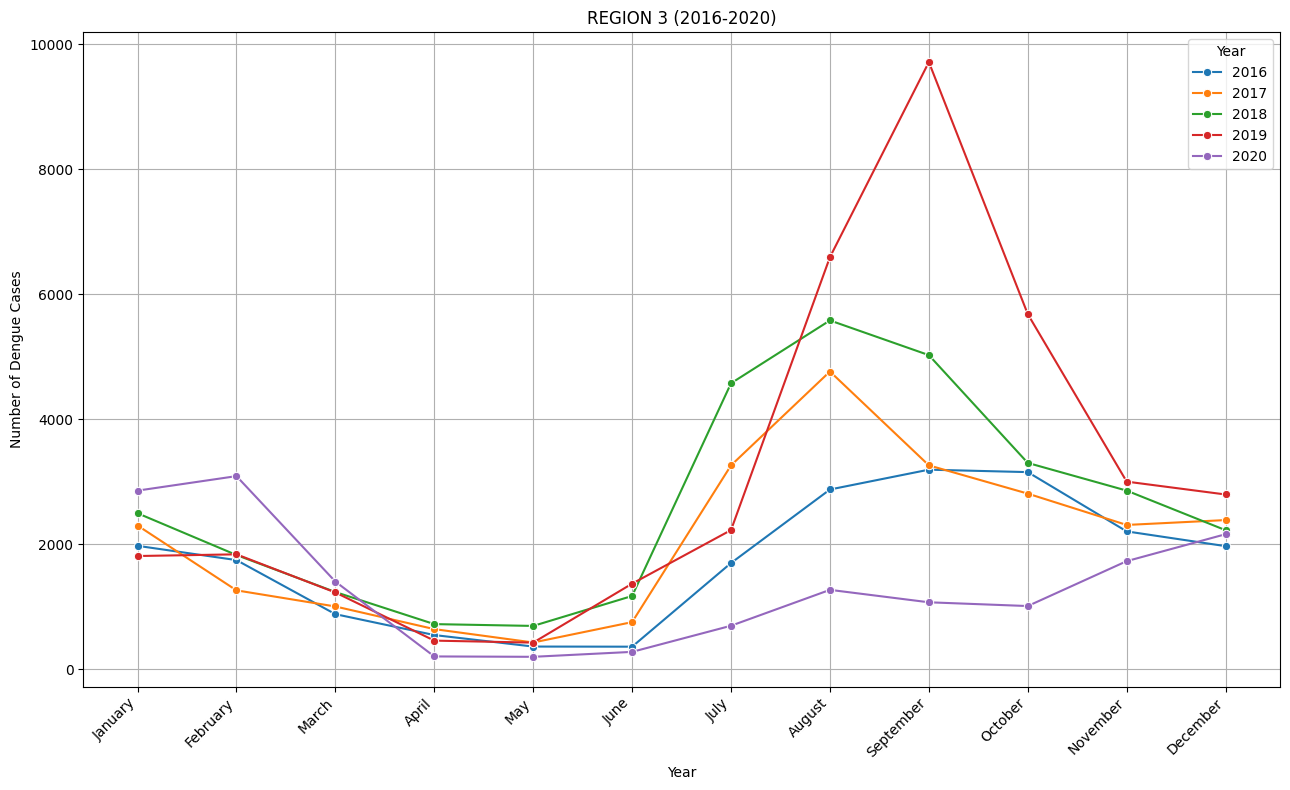

In [46]:
sns.lineplot( data=region3, x='Month', y='Dengue_Cases', hue = 'Year', marker='o')
plt.gcf().set_size_inches(13, 8)
plt.title('REGION 3 (2016-2020)')
plt.xlabel('Year')
plt.ylabel('Number of Dengue Cases')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

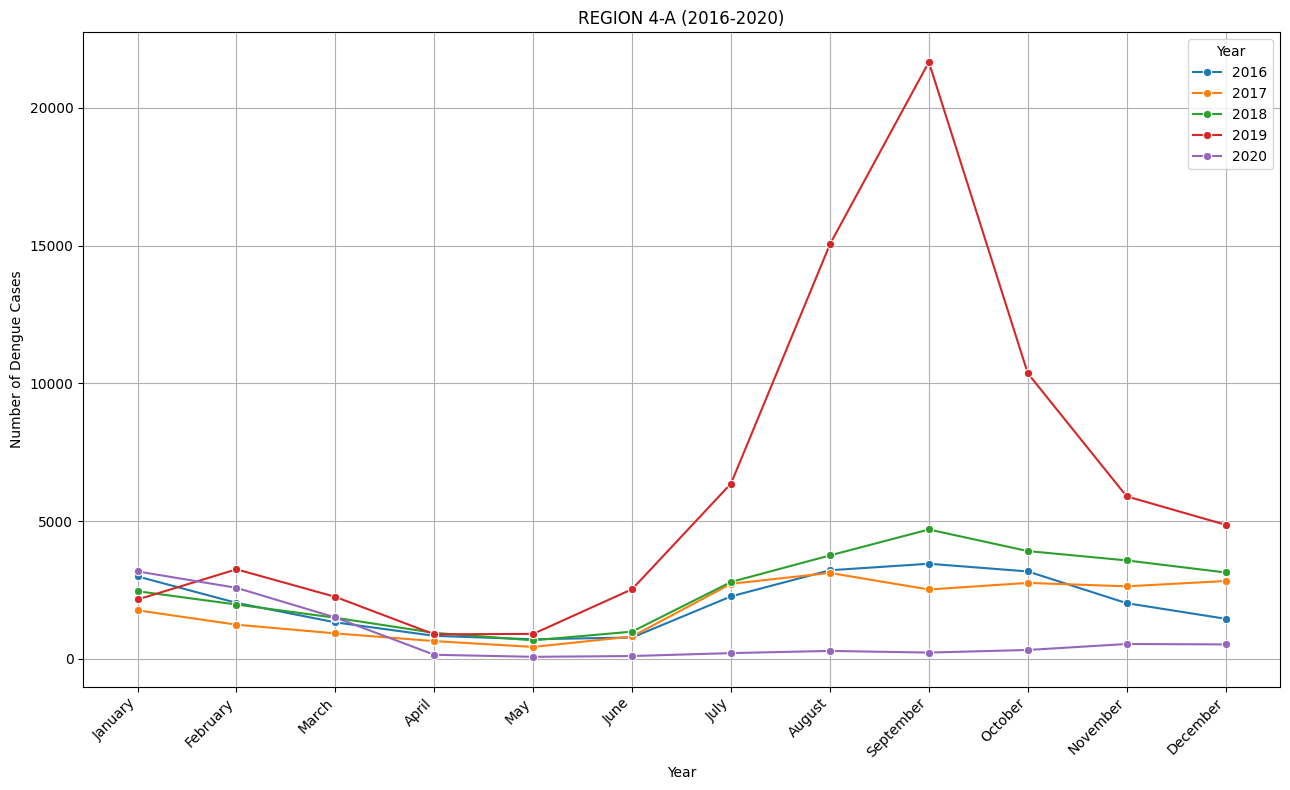

In [47]:
sns.lineplot( data=region4a, x='Month', y='Dengue_Cases', hue = 'Year', marker='o')
plt.gcf().set_size_inches(13, 8)
plt.title('REGION 4-A (2016-2020)')
plt.xlabel('Year')
plt.ylabel('Number of Dengue Cases')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

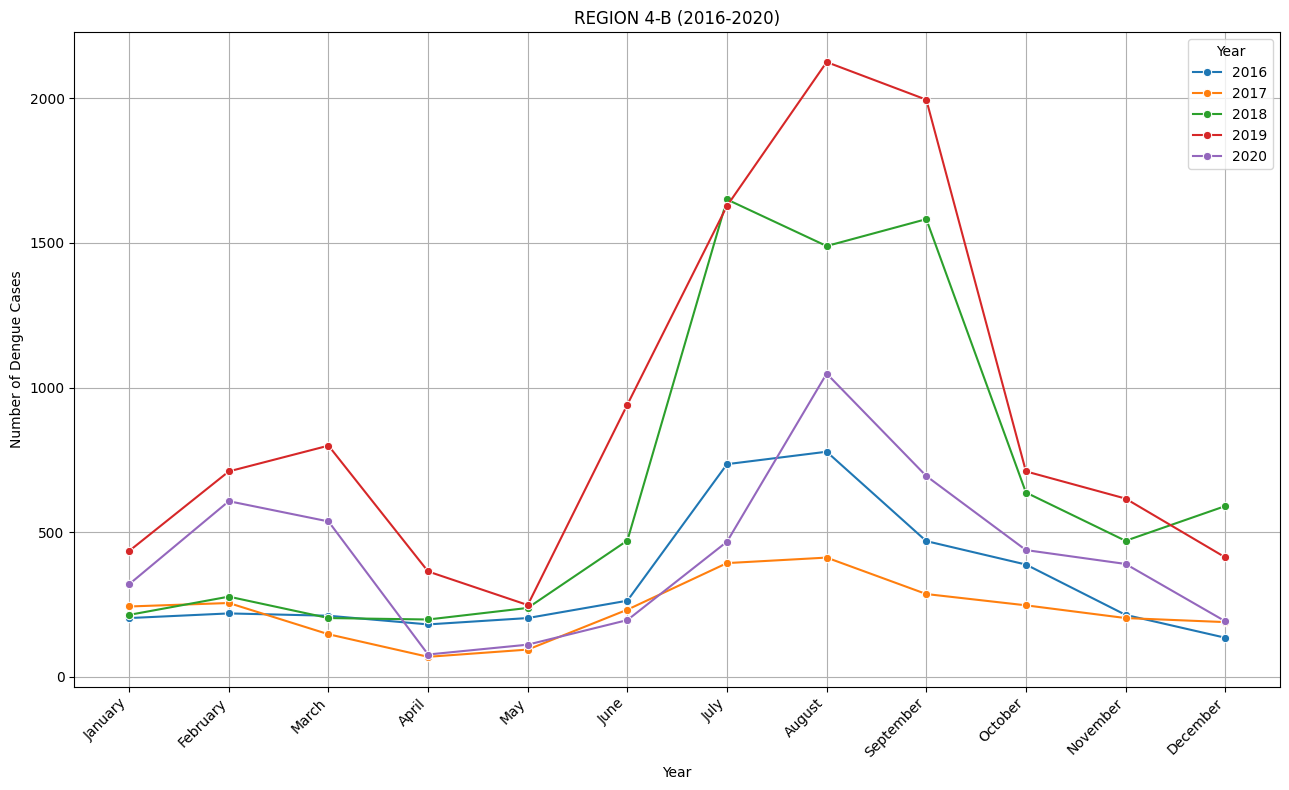

In [48]:
sns.lineplot( data=region4b, x='Month', y='Dengue_Cases', hue = 'Year', marker='o')
plt.gcf().set_size_inches(13, 8)
plt.title('REGION 4-B (2016-2020)')
plt.xlabel('Year')
plt.ylabel('Number of Dengue Cases')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

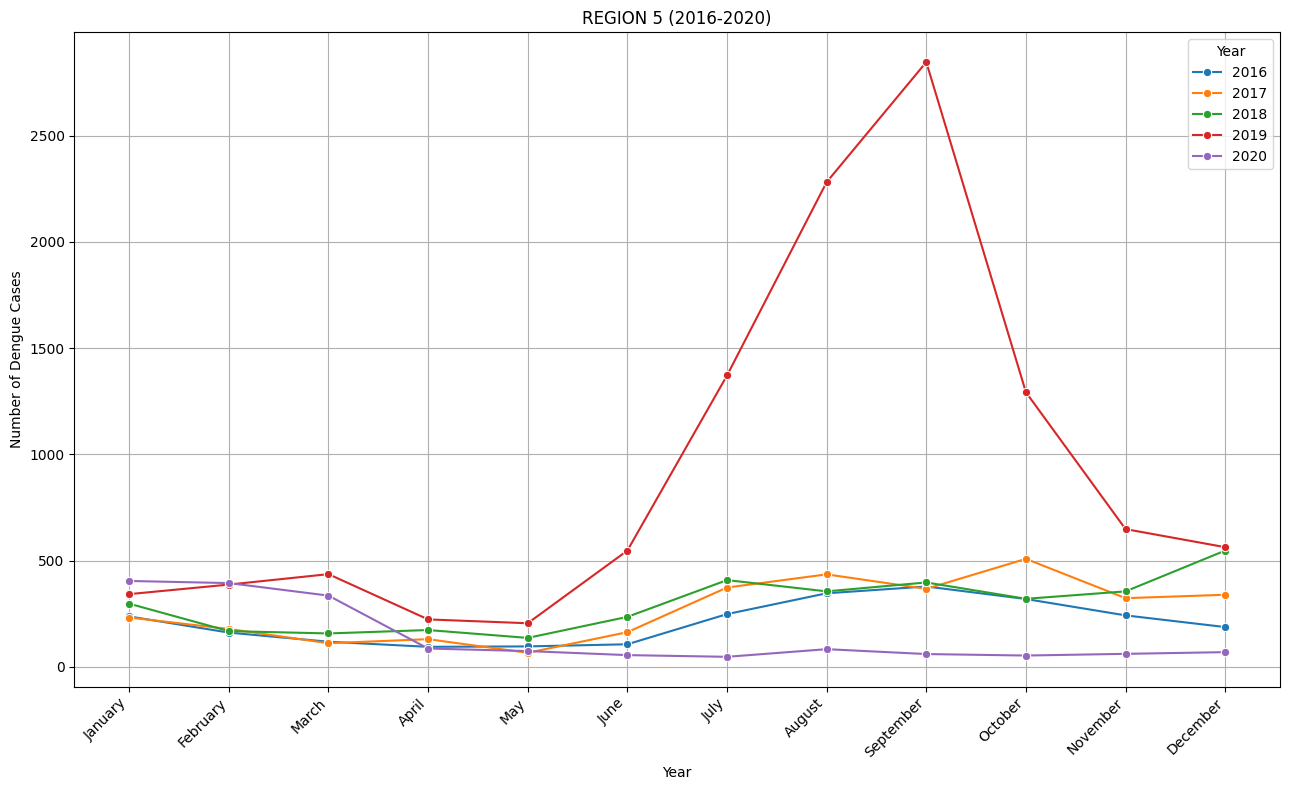

In [49]:
sns.lineplot( data=region5, x='Month', y='Dengue_Cases', hue = 'Year', marker='o')
plt.gcf().set_size_inches(13, 8)
plt.title('REGION 5 (2016-2020)')
plt.xlabel('Year')
plt.ylabel('Number of Dengue Cases')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

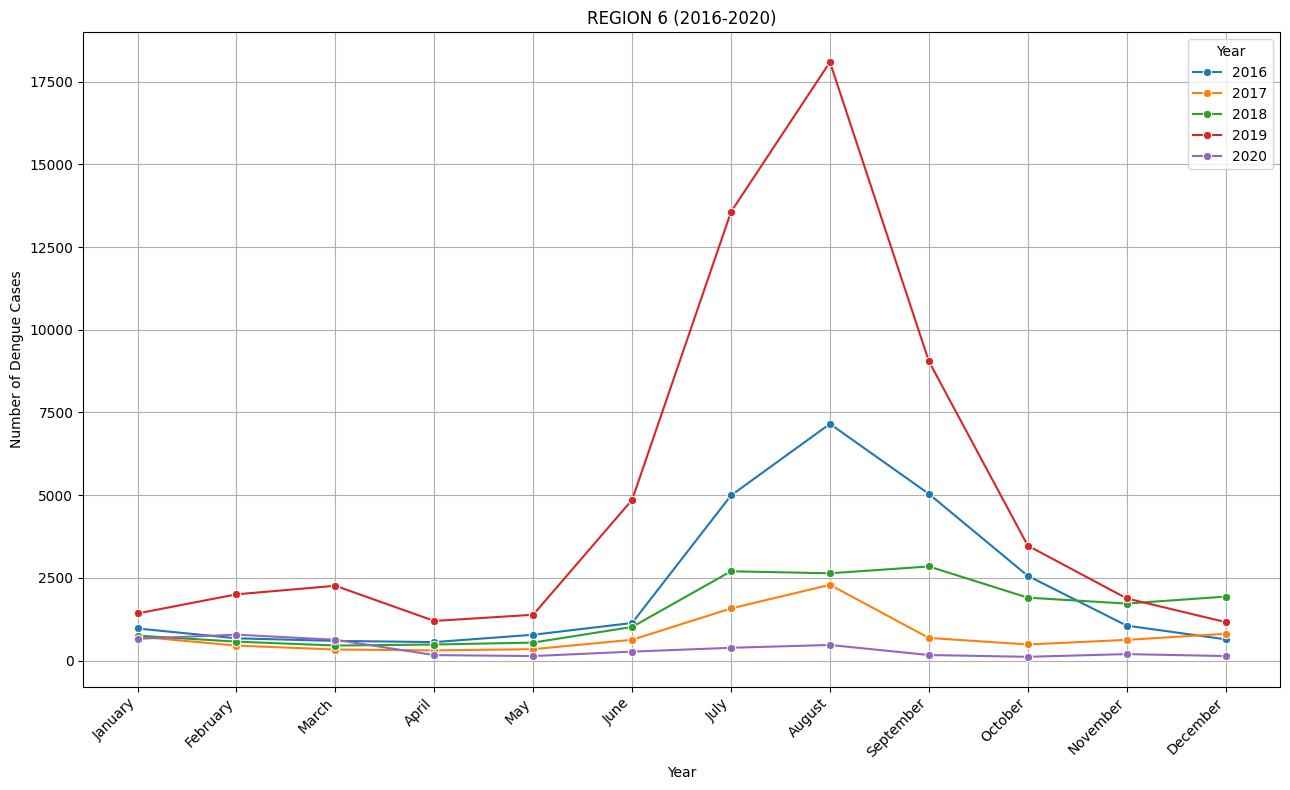

In [50]:
sns.lineplot( data=region6, x='Month', y='Dengue_Cases', hue = 'Year', marker='o')
plt.gcf().set_size_inches(13, 8)
plt.title('REGION 6 (2016-2020)')
plt.xlabel('Year')
plt.ylabel('Number of Dengue Cases')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

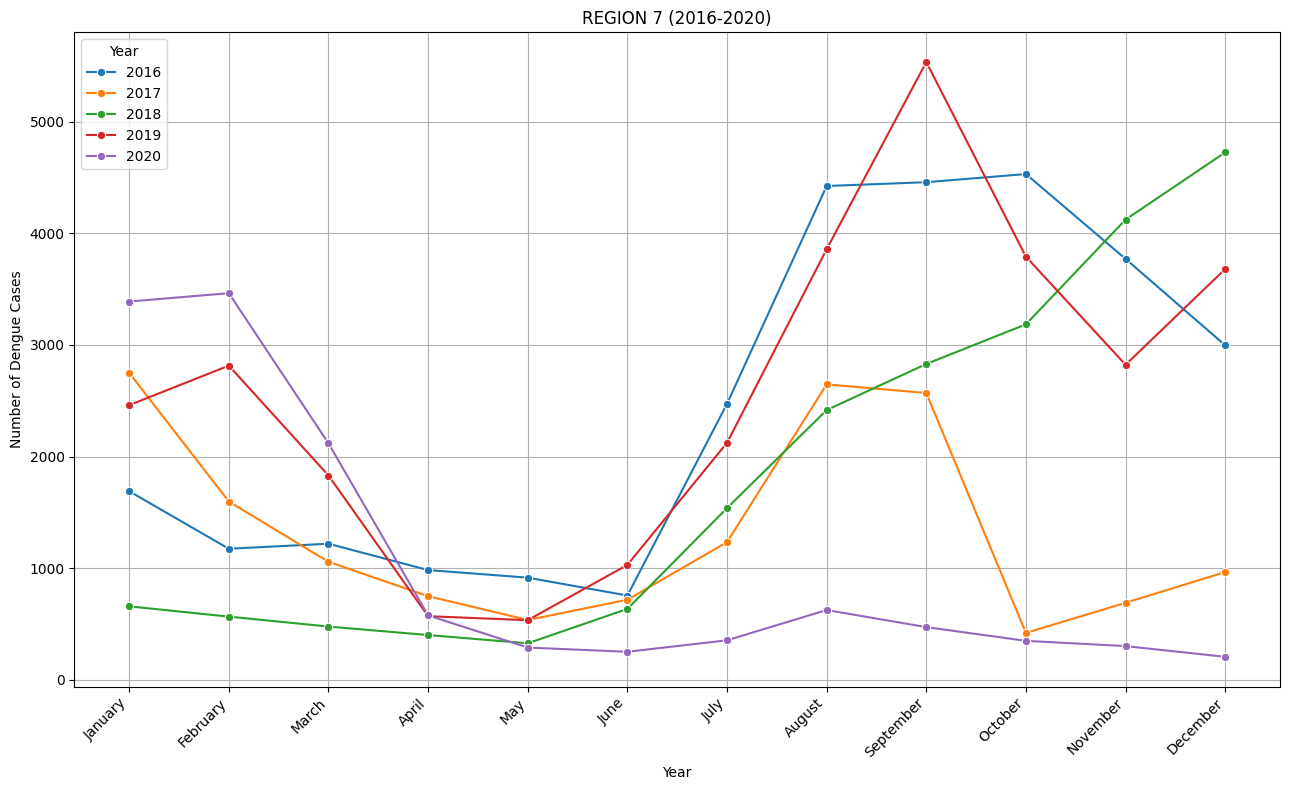

In [51]:
sns.lineplot( data=region7, x='Month', y='Dengue_Cases', hue = 'Year', marker='o')
plt.gcf().set_size_inches(13, 8)
plt.title('REGION 7 (2016-2020)')
plt.xlabel('Year')
plt.ylabel('Number of Dengue Cases')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

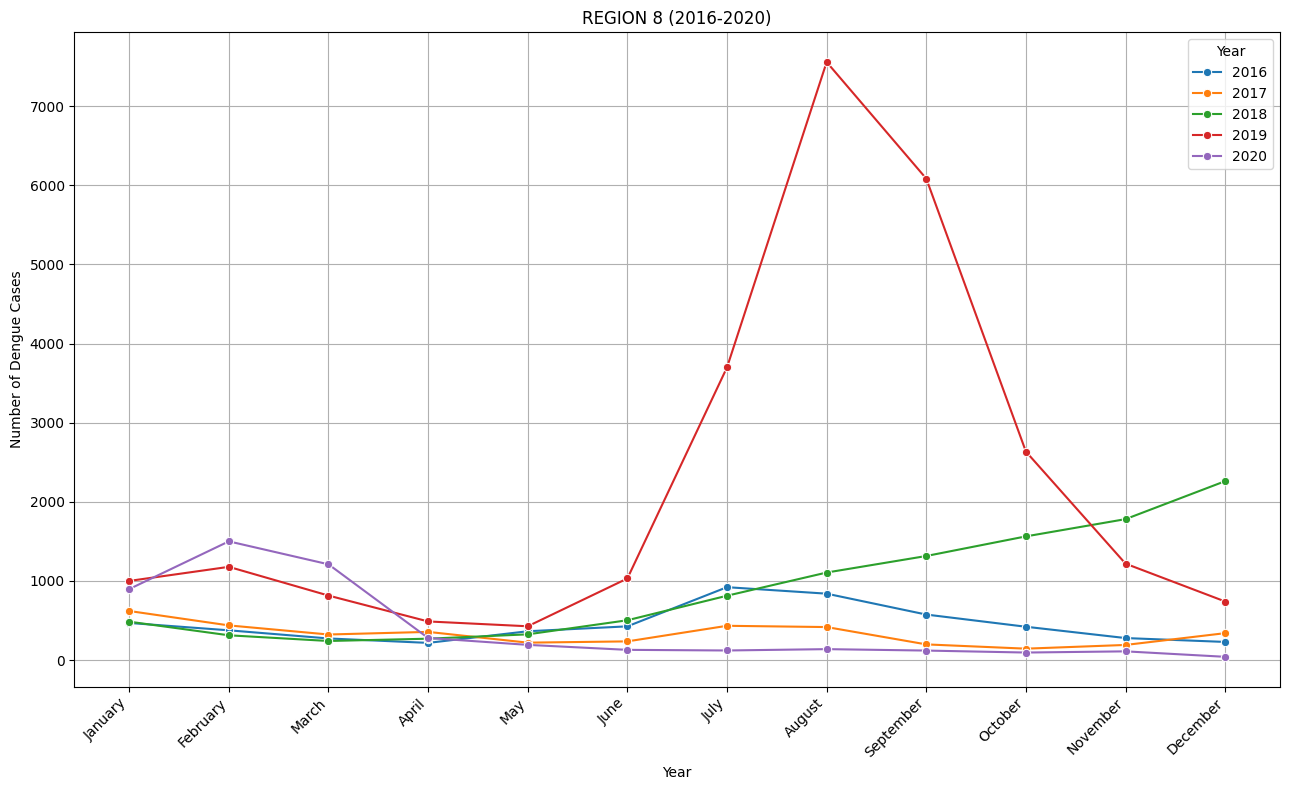

In [52]:
sns.lineplot( data=region8, x='Month', y='Dengue_Cases', hue = 'Year', marker='o')
plt.gcf().set_size_inches(13, 8)
plt.title('REGION 8 (2016-2020)')
plt.xlabel('Year')
plt.ylabel('Number of Dengue Cases')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

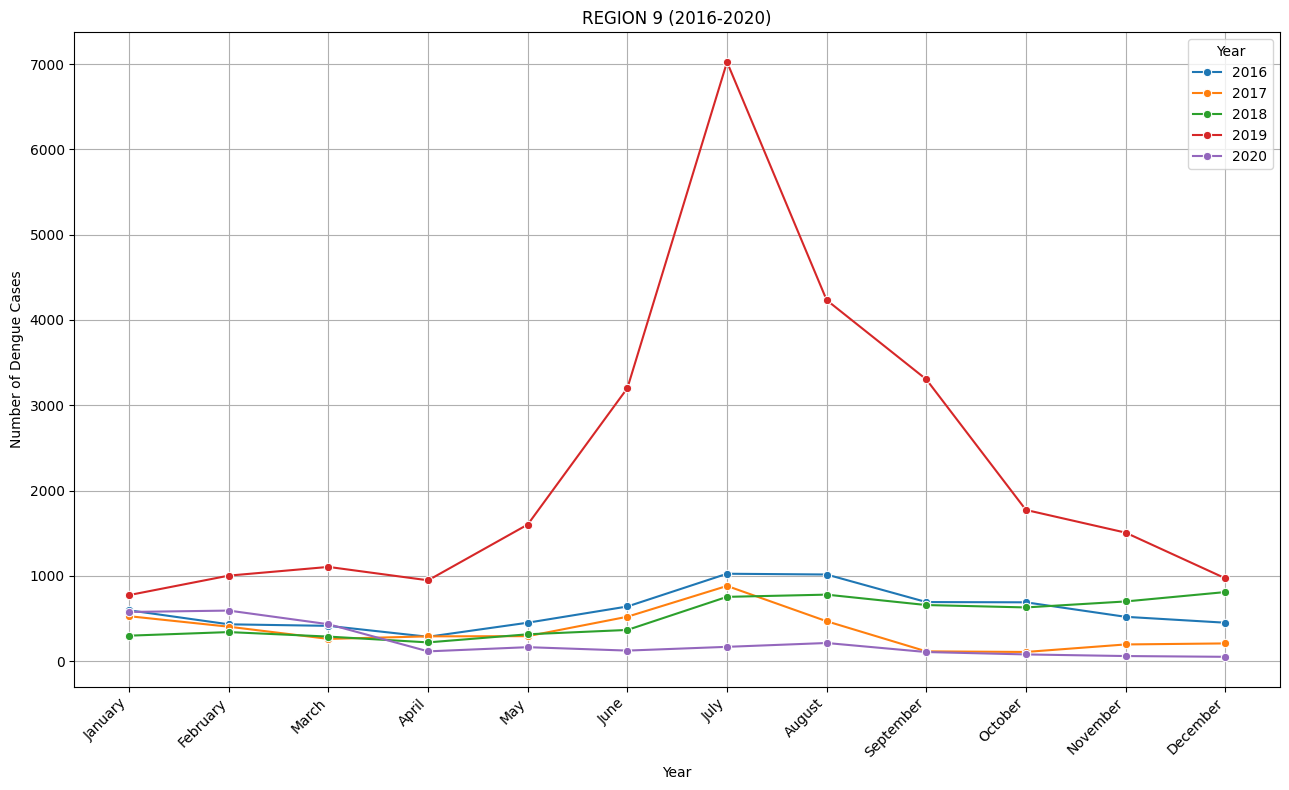

In [53]:
sns.lineplot( data=region9, x='Month', y='Dengue_Cases', hue = 'Year', marker='o')
plt.gcf().set_size_inches(13, 8)
plt.title('REGION 9 (2016-2020)')
plt.xlabel('Year')
plt.ylabel('Number of Dengue Cases')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

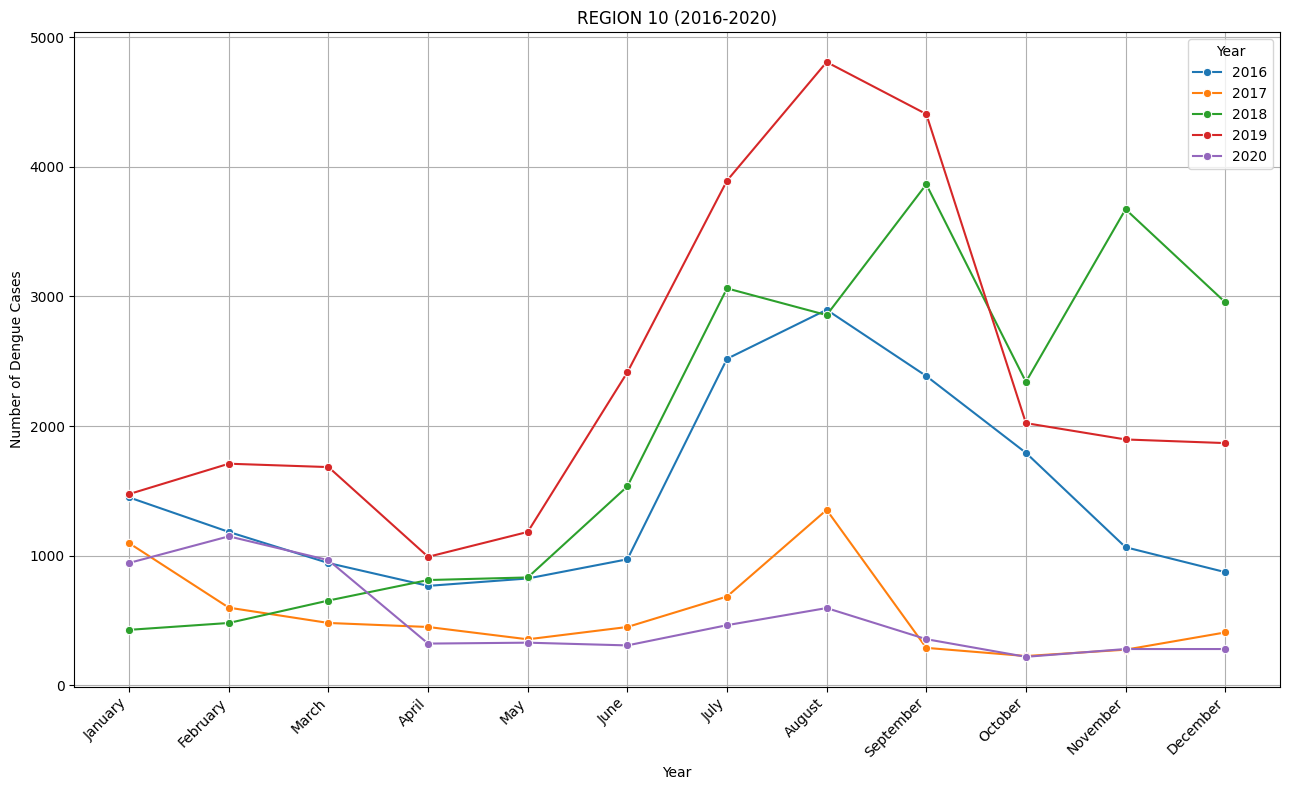

In [54]:
sns.lineplot( data=region10, x='Month', y='Dengue_Cases', hue = 'Year', marker='o')
plt.gcf().set_size_inches(13, 8)
plt.title('REGION 10 (2016-2020)')
plt.xlabel('Year')
plt.ylabel('Number of Dengue Cases')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

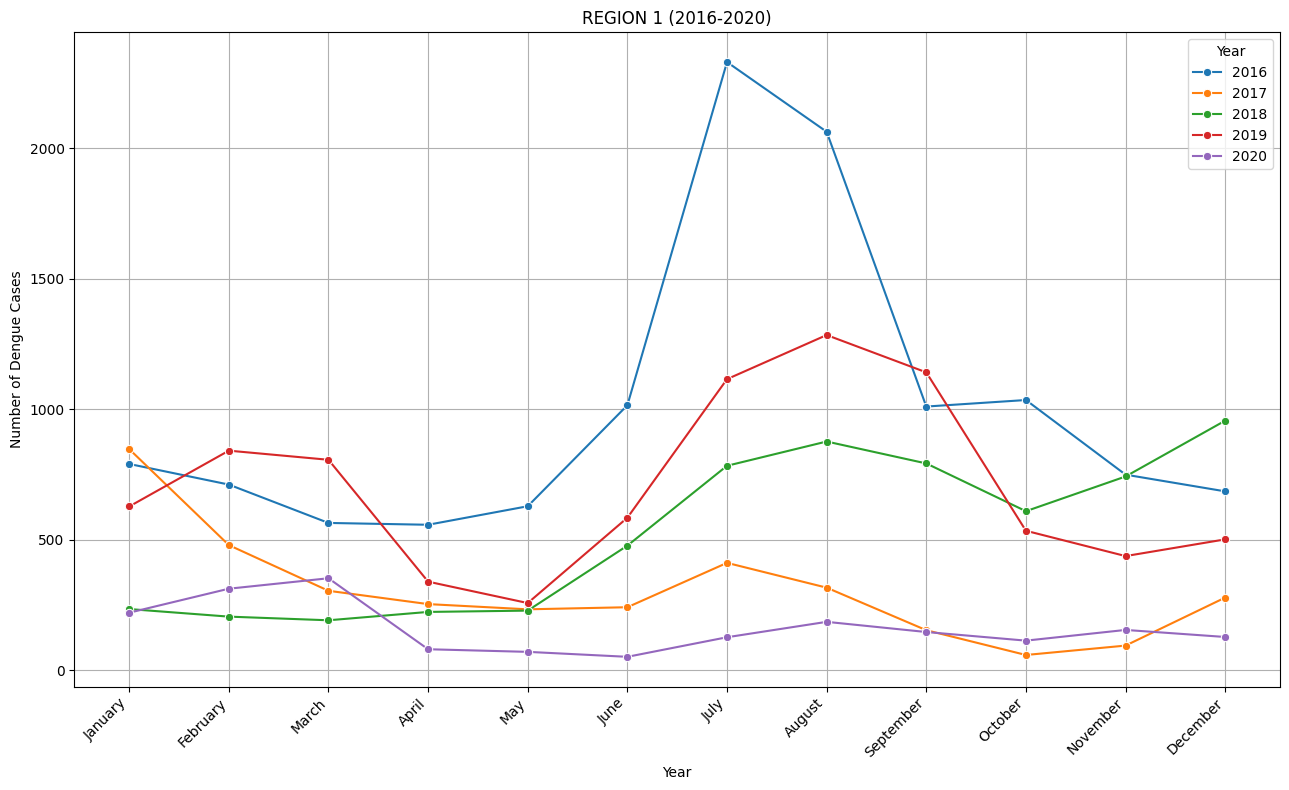

In [55]:
sns.lineplot( data=region11, x='Month', y='Dengue_Cases', hue = 'Year', marker='o')
plt.gcf().set_size_inches(13, 8)
plt.title('REGION 1 (2016-2020)')
plt.xlabel('Year')
plt.ylabel('Number of Dengue Cases')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

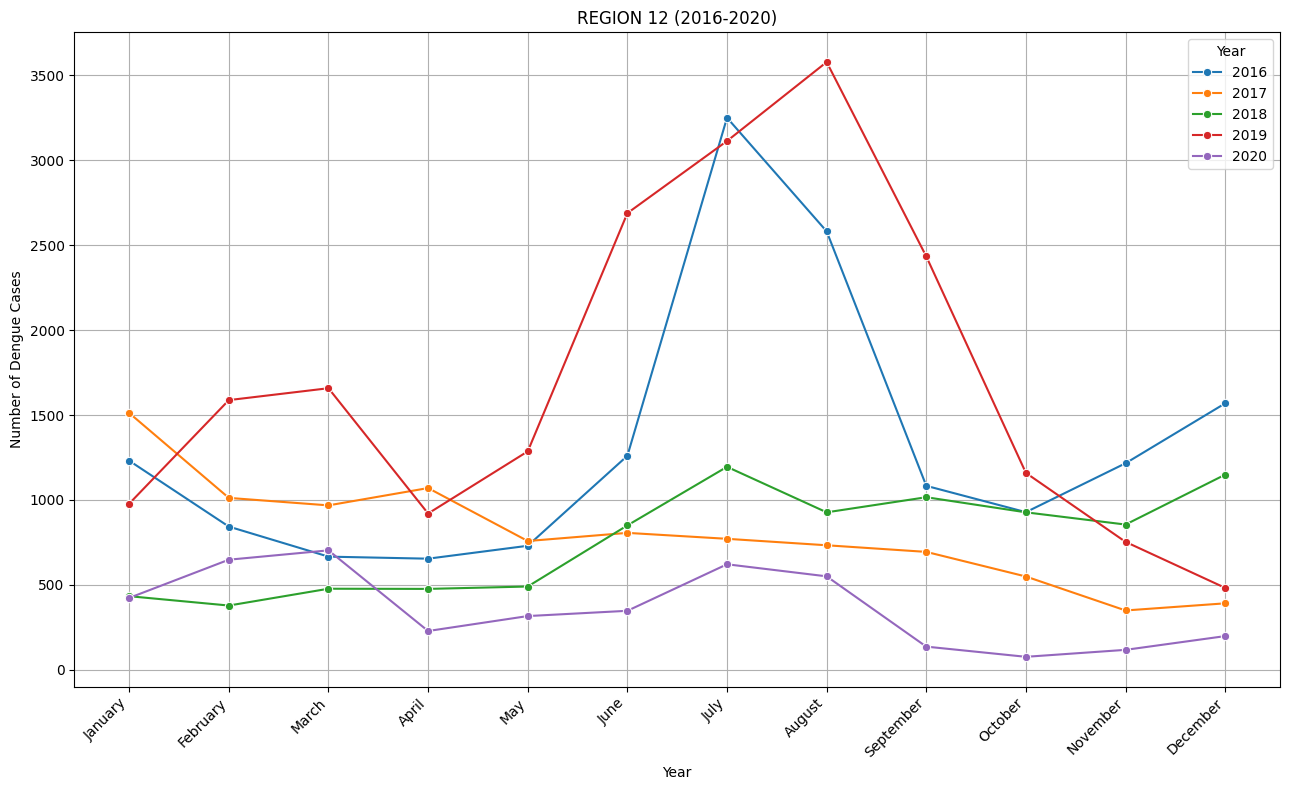

In [56]:
sns.lineplot( data=region12, x='Month', y='Dengue_Cases', hue = 'Year', marker='o')
plt.gcf().set_size_inches(13, 8)
plt.title('REGION 12 (2016-2020)')
plt.xlabel('Year')
plt.ylabel('Number of Dengue Cases')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

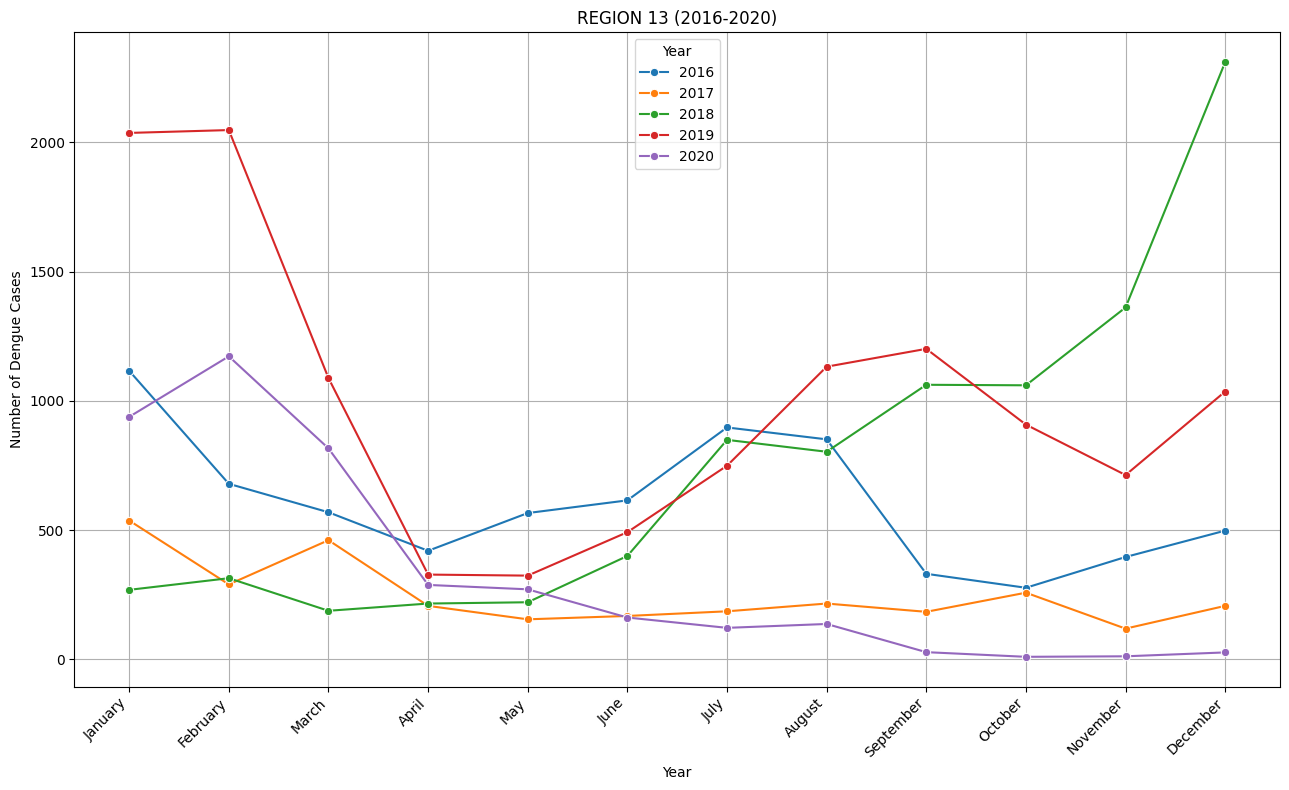

In [57]:
sns.lineplot( data=region13, x='Month', y='Dengue_Cases', hue = 'Year', marker='o')
plt.gcf().set_size_inches(13, 8)
plt.title('REGION 13 (2016-2020)')
plt.xlabel('Year')
plt.ylabel('Number of Dengue Cases')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

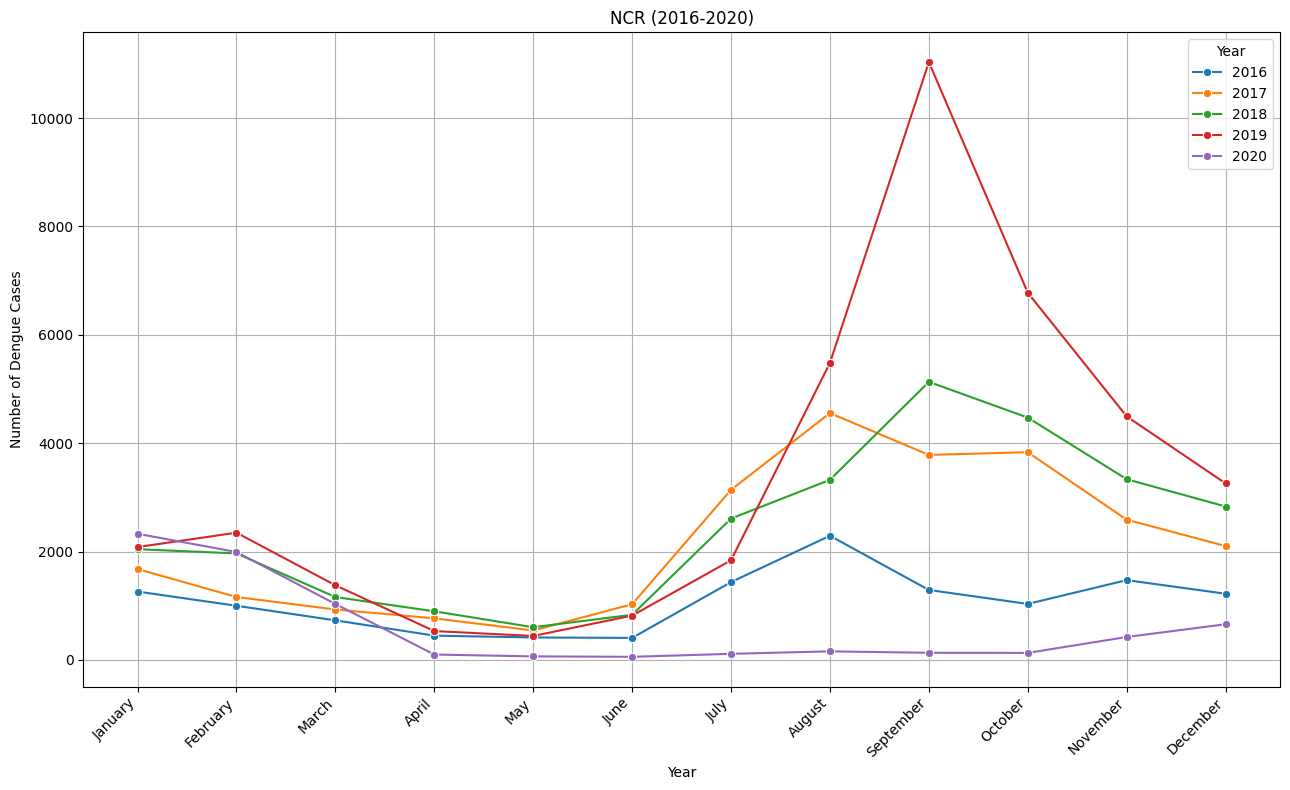

In [58]:
sns.lineplot( data=ncr, x='Month', y='Dengue_Cases', hue = 'Year', marker='o')
plt.gcf().set_size_inches(13, 8)
plt.title('NCR (2016-2020)')
plt.xlabel('Year')
plt.ylabel('Number of Dengue Cases')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

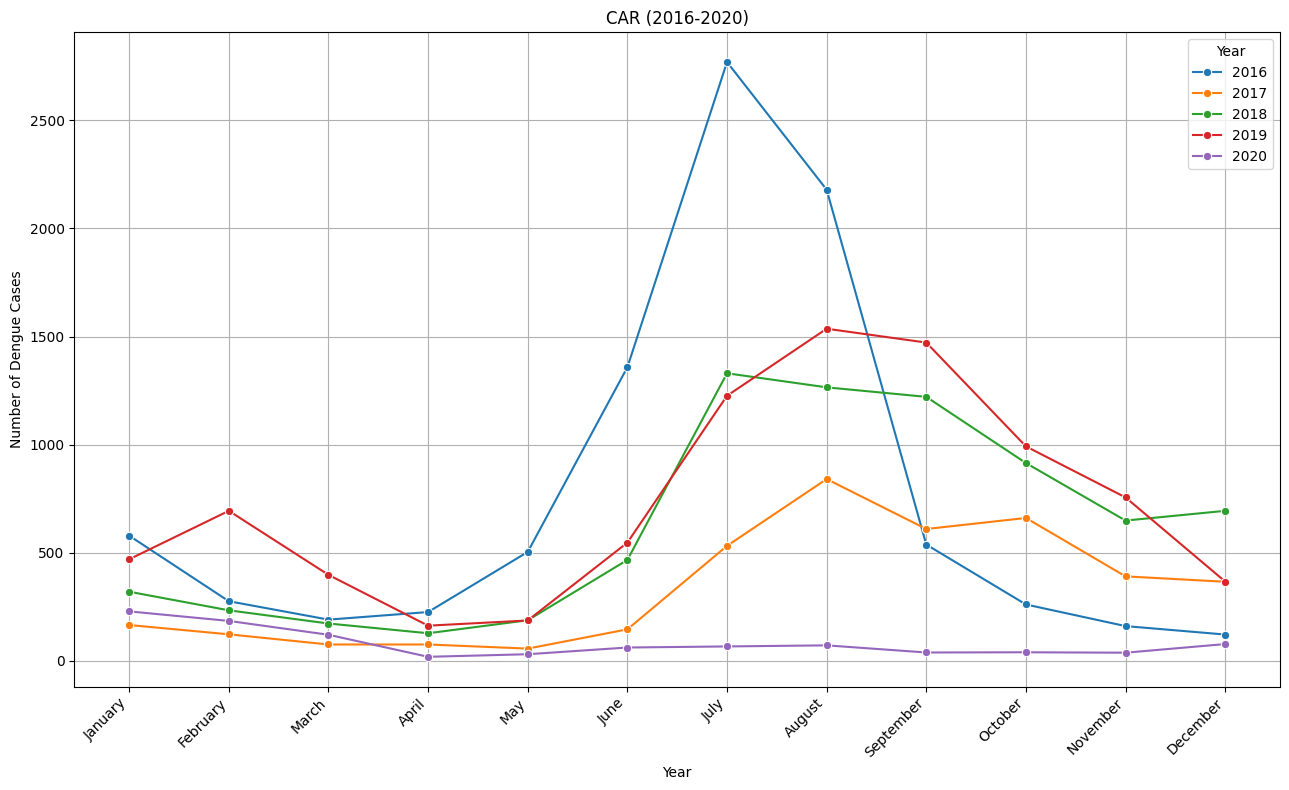

In [59]:
sns.lineplot( data=car, x='Month', y='Dengue_Cases', hue = 'Year', marker='o')
plt.gcf().set_size_inches(13, 8)
plt.title('CAR (2016-2020)')
plt.xlabel('Year')
plt.ylabel('Number of Dengue Cases')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()